# Скаларне карактеристике вектора


Садржај:
1. [Норма вектора](#Норма-вектора)
1. [Статистичке карактеристике вектора](#Статистичке-карактеристике-вектора)
1. [Центрирани и стандардизовани вектори](#Центрирани-и-стандардизовани-вектори)
1. [Коваријанса и корелација](#Коваријанса-и-корелација)

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Норма вектора

**Дефиниција 1.** Нека је $V$ векторски простор над пољем скалара $\mathbb{R}.$ Пресликавање $\|\cdot\|:V\to\mathbb{R}_0^+$ назива се норма вектора на $V$ уколико има особине:
- Н1: $\quad\|v\|=0\ \Longleftrightarrow\ v=\theta,\quad\forall v\in V;$
- Н2: $\quad\|\alpha v\|=|\alpha|\,\|v\|,\quad\forall v\in V,\alpha\in\mathbb{R};$
- Н3: $\quad\|u+v\|\leq\|u\|+\|v\|,\quad\forall u,v\in V.$

Norma je funkcija koja kao ulaz ima neki vektor, a izlaz te funkcije je pozitivna vrednost formirana na osnovu karakteristika ulaznog vektora. Minimum funkcije norme postiže se samo u slučaju ulaza koji je nula-vektor $\theta.$ Pojam norme je u osnovi svih algoritama mašinskog učenja s obzirom  da se putem norme izražava kvalitet rezultata algoritama ili opisuje cilj algoritma. 

Najčešće korišćene norme vektora predstavljaju tzv. $L_p$ norme: $\|v\|_p=\left(\displaystyle\sum_{k=1}^n|x_k|^p\right)^{1/p},\ p\geq1,$ čiji su specijalni slučajevi: 

-  $L_1$: $\|v\|_1=\displaystyle\sum_{k=1}^n|x_k|,$ poznata još i kao Menhetn norma ili taksi norma,
-  $L_2$: $\|v\|_2=\sqrt{\displaystyle\sum_{k=1}^n|x_k|^2},$ Euklidova norma,
-  $L_{\infty}$: $\|v\|_{\infty}=\displaystyle\max_{k}\{|x_k|\},$ maks norma ili norma Čebiševa.

Od navedenih normi jedino je Euklidova norma indukovana skalarnim proizvodom. Drugim rečima, minimizacioni problemi u odnosu na ovu normu jedini mogu da se rešavaju projekcijama.

Postojanje različitih normi u upotrebi znači da jedan isti vektor može da ima različite vrednosti norme. Izbor norme koja će se upotrebiti u konkretnom primeru zavisi od njenih karakteristika, tj. od vrste rezultata koji je potrebno dobiti. U tome veliku ulogu igra geometrija jedinične sfere, tj. vektora koji u odnosu na izabaranu normu predstavljaju jedinične vektore.

**Primer 1.** Potražićemo jedinične kružnice u ravni u odnosu na norme : $L_1,L_{3/2},L_2,L_4$ i $L_{\max}.$

Jediničnu kružnicu u odnosu na $L_1$ normu čine sledeći vektori $v=\begin{bmatrix}x&y\end{bmatrix}:$
$$\|v\|_1=|x|+|y|=1.$$
U prvom kvadrantu, gde je $x,y\geq0,$ to su vektori čije koordinate zadovoljavaju jednakost $x+y=1\quad\Longleftrightarrow\quad y=1-x.$

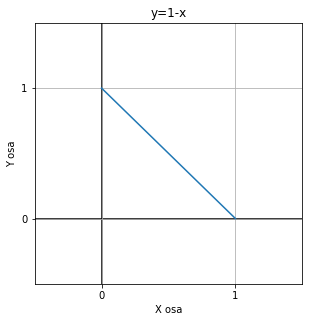

In [2]:
x=np.linspace(0,1,50)
y=1-x
plt.figure(figsize=plt.figaspect(1))
plt.title("y=1-x") 
plt.plot(x,y)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xticks([ 0, 1])
plt.yticks([ 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Za ostale kvadarnte možemo da iskoristimo činjenicu da je $|x|+|y|=|-x|+|y|=|x|+|-y|=|-x|+|-y|,$ tj. slika će biti simetrična u odnosu na $x$ i $y$ osu.

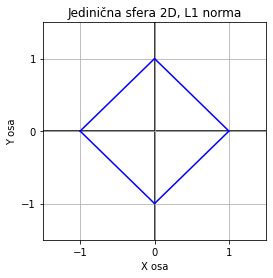

In [3]:
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L1 norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

U slučaju da ovakvu analizu jedinične sfere ne želimo do sprovedemo, tj. ako ne želimo da dobijemo eksplicitni oblik funkcije zavisnosti koordinata $y=f(x),$ za prikaz krajnjih tačaka jediničnih vektora možemo da koristimo logičke nizove ili [nizove sa maskom](https://numpy.org/doc/stable/reference/maskedarray.html). 

In [4]:
n=100
t=np.linspace(-1,1,n)
Xt,Yt=np.meshgrid(t,t)
Xt=Xt.reshape(n*n,)
Yt=Yt.reshape(n*n,)

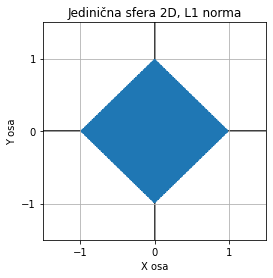

In [5]:
Zt=(np.abs(Xt)+np.abs(Yt)<=1)
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L1 norma") 
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Jediničnu kružnicu u odnosu na $L_{3/2}$ normu čine sledeći vektori $v=\begin{bmatrix}x&y\end{bmatrix}:$
$$\|v\|_{3/2}=\big(|x|^{3/2}+|y|^{3/2}\big)^{2/3}=1.$$
U prvom kvadrantu, gde je $x,y\geq0,$ to su vektori čije koordinate zadovoljavaju jednakost $x^{3/2}+y^{3/2}=1\quad\Longleftrightarrow\quad y=\big(1-x^{3/2}\big)^{2/3}.$

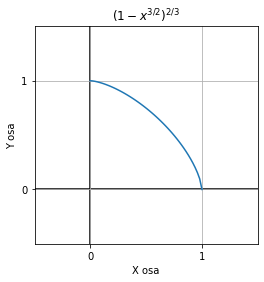

In [6]:
y=(1-x**(3/2))**(2/3)
plt.figure(figsize=plt.figaspect(1))
plt.title(r"$(1-x^{3/2})^{2/3}$") 
plt.plot(x,y)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.xticks([ 0, 1])
plt.yticks([ 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Za ostale kvadarnte možemo da iskoristimo činjenicu da je $|x|^{3/2}+|y|^{3/2}=|-x|^{3/2}+|y|^{3/2}=|x|^{3/2}+|-y|^{3/2}=|-x|^{3/2}+|-y|^{3/2},$ tj. slika će biti simetrična u odnosu na $x$ i $y$ osu.

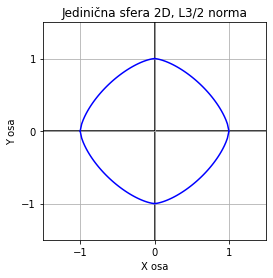

In [7]:
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L3/2 norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

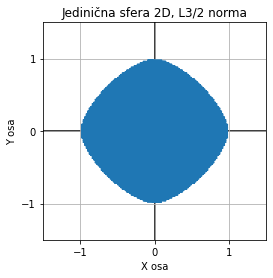

In [8]:
Zt=(np.abs(Xt)**(3/2)+np.abs(Yt)**(3/2)<=1)
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L3/2 norma") 
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Na slične načine dobijamo prikaze jediničnih kružnica u odnosu na ostale norme.

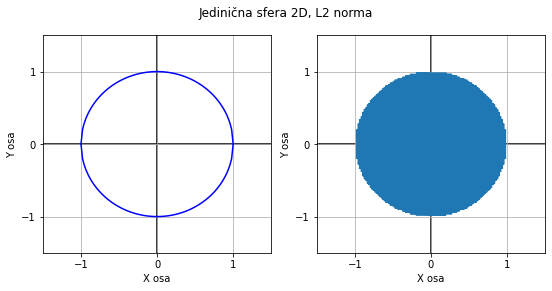

In [9]:
y=(1-x**2)**(1/2)
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Jedinična sfera 2D, L2 norma')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)              
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
Zt=(np.abs(Xt)**2+np.abs(Yt)**2<=1)
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

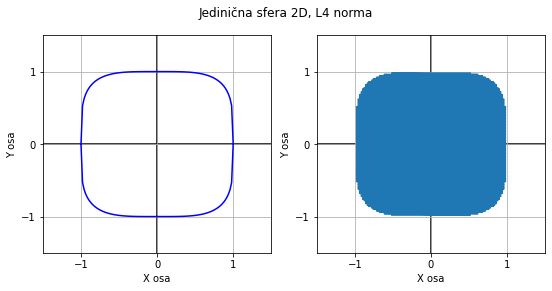

In [10]:
y=(1-x**4)**(1/4)
slika, ax = plt.subplots(1, 2,figsize=(9,4)) 
slika.suptitle('Jedinična sfera 2D, L4 norma')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

plt.subplot(1, 2, 2)
Zt=(np.abs(Xt)**4+np.abs(Yt)**4<=1)
plt.plot(Xt[Zt],Yt[Zt])
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

U slučaju $L_{\max}$ norme jedinični vektori su određeni jednakošću $\max\{|x|,|y|\}=1.$ Zbog toga jediničnu kružnicu čine odsečci pravih $x=\pm1$ i $y=\pm1.$

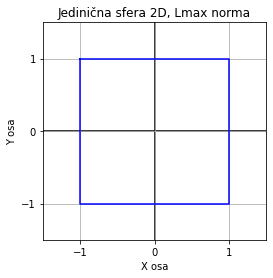

In [11]:
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, Lmax norma") 
plt.plot([-1,1,1,-1,-1],[1,1,-1,-1,1],'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

**Primer 2.** Potražićemo jedinične kružnice u 3D u odnosu na norme : $L_1,L_{3/2},L_2,l_4$ i $L_{\max}.$

Jediničnu kružnicu u odnosu na $L_1$ normu čine sledeći vektori $v=\begin{bmatrix}x&y&z\end{bmatrix}:$
$$\|v\|_1=|x|+|y|+|z|=1.$$
U prvom oktantu, gde je $x,y,z\geq0,$ to su vektori čije koordinate zadovoljavaju jednakost $x+y+z=1\quad\Longleftrightarrow\quad y=1-x-y.$ Krajnje tačke ovih vektora leže na ravni.

In [12]:
%matplotlib notebook

In [13]:
x=np.linspace(0,1,200)

X,Y=np.meshgrid(x,x)

<IPython.core.display.Javascript object>


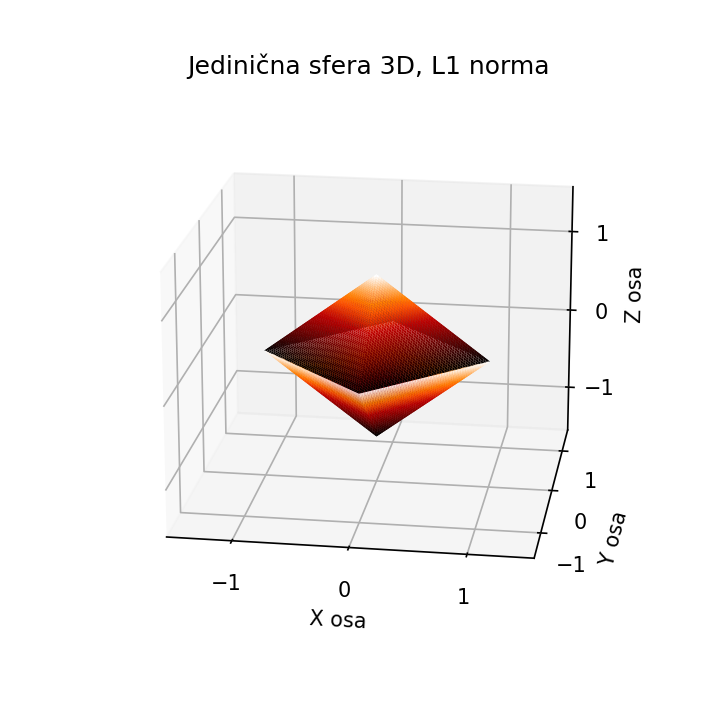

In [14]:
Z1=1-X-Y
Z1=np.ma.masked_where(Z1<0,Z1)

slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, L1 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)



ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

Jedinične sfere u 3D u odnosu na ostale norme opisujemo analogno.

<IPython.core.display.Javascript object>


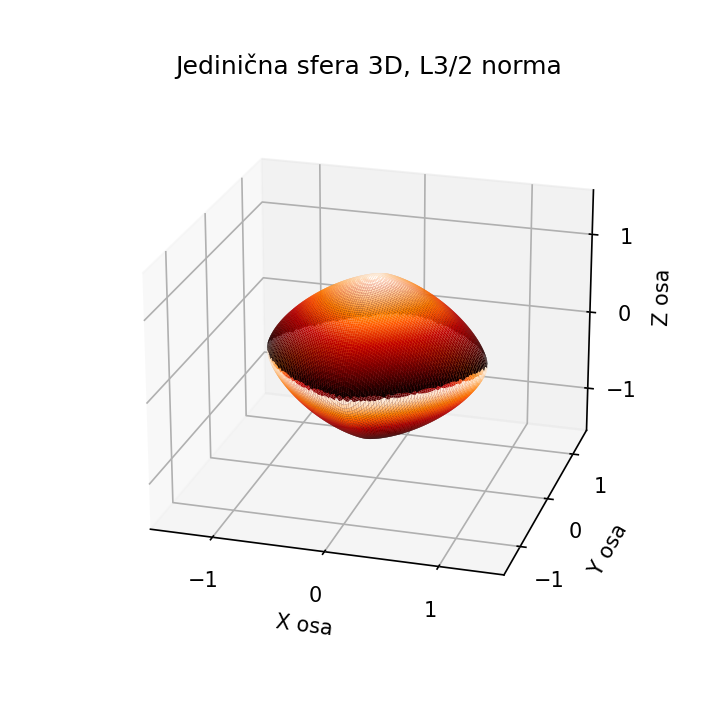

In [15]:
Z1=1-X**(3/2)-Y**(3/2)
Z1=(np.ma.masked_where(Z1<0,Z1))**(2/3)


slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, L3/2 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)



ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

<IPython.core.display.Javascript object>


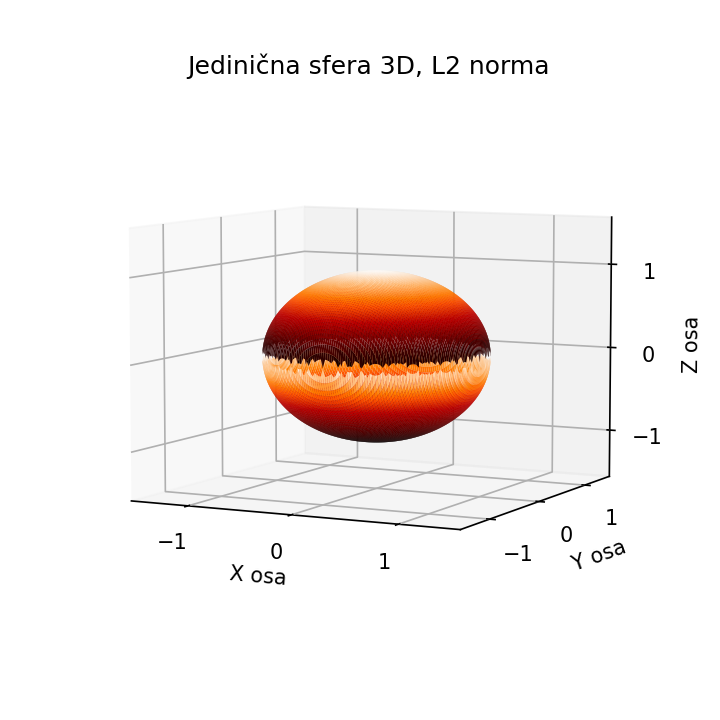

In [16]:
Z1=1-X**2-Y**2
Z1=(np.ma.masked_where(Z1<0,Z1))**(1/2)


slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, L2 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)



ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

<IPython.core.display.Javascript object>


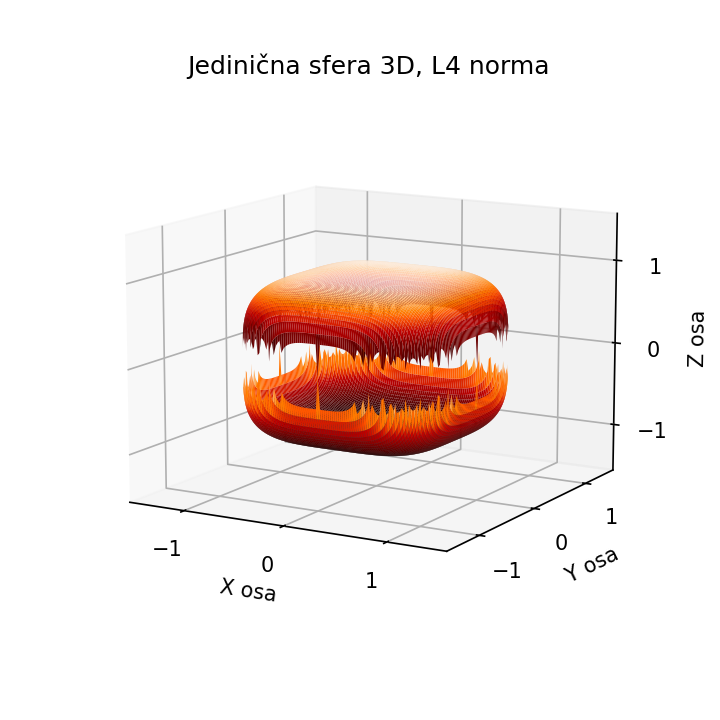

In [17]:
Z1=1-X**4-Y**4
Z1=(np.ma.masked_where(Z1<0,Z1))**(1/4)


slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, L4 norma") 
ax.plot_surface(X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(X,-Y,-Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,Z1, cmap=cm.gist_heat)
ax.plot_surface(-X,-Y,-Z1, cmap=cm.gist_heat)


ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

<IPython.core.display.Javascript object>


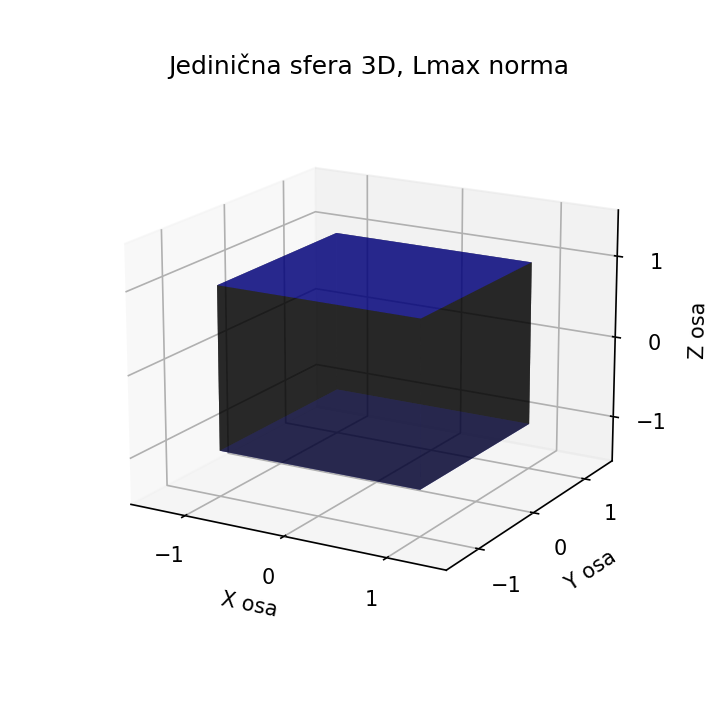

In [18]:
x=np.array([-1,1,1,-1])
X,Y=np.meshgrid(x,x)
Zh=np.ones((4,4))
c=0.2

slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Jedinična sfera 3D, Lmax norma") 
ax.plot_surface(X,Y,Zh, color="b",alpha=c)
ax.plot_surface(X,Y,-Zh, color="b",alpha=c)
ax.plot_surface(Zh,Y,X, cmap=cm.gist_heat,alpha=c)
ax.plot_surface(-Zh,Y,X, cmap=cm.gist_heat,alpha=c)
ax.plot_surface(X,Zh,Y, cmap=cm.gist_heat,alpha=c)
ax.plot_surface(X,-Zh,Y, cmap=cm.gist_heat,alpha=c)
plt.xlabel('X osa')
plt.ylabel('Y osa')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set(xlabel='X osa', ylabel='Y osa', zlabel='Z osa');

In [19]:
%matplotlib inline

Za izračunavanje $L_p$ normi vektora koristi se funkcija [norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) iz  **linalg** biblioteke NumPy-a. Nejjednostavnija sintaksa je
```python
numpy.linalg.norm(vektor[,ord=2])
```
Argument **ord** je opcioni. Ukoliko je izostavljen funkcija vraća vrednost Euklidove norme za argument **vektor**. 
Dozvoljene vrednosti argumenta **ord** su bilo koja celobrojna vrednost, ili Python rezervisani simboli `inf` i `-inf`. Menhetn $(L_1)$ i max norma $(L_{\max})$ dobijaju se za vrednosti **ord=1** i **ord=inf**. Za celobrojne vrednosti  **ord**$<1$ ne dobijaju se norme, već funkcije komponenti vektora koje zovemo subnorme. Nose takvo ime jer ne zadovoljavaju neku od aksioma  norme. Više o tome biće rečeno u temi o konveksnosti. 

**Primer 3.** Izračunaćemo $L_1,$ $L_2$ i $L_{\infty}$ norme vektora $v$ i $u.$
$$v=\begin{bmatrix}1&1&-1&-1\end{bmatrix}^T,\qquad u=\begin{bmatrix}1+2j&2-1j&0&-2j\end{bmatrix}^T.$$

In [20]:
v=np.array([1,1,-1,-1])
u=np.array([1+2j,2-1j,0,-2j])
print("||v||2=",np.linalg.norm(v))  #Euklidova norma vektora
print("||u||2=",np.linalg.norm(u))  #Euklidova norma vektora

||v||2= 2.0
||u||2= 3.7416573867739413


In [21]:
print("||v||2=",np.linalg.norm(v,2))  #Euklidova norma vektora
print("||u||2=",np.linalg.norm(u,2))  #Euklidova norma vektora

||v||2= 2.0
||u||2= 3.7416573867739413


In [22]:
print("||v||1=",np.linalg.norm(v,1))  #Menhetn norma vektora
print("||u||1=",np.linalg.norm(u,1))  #Menhetn norma vektora

||v||1= 4.0
||u||1= 6.47213595499958


In [23]:
print("||v||max=",np.linalg.norm(v,np.inf))  #Max norma vektora
print("||u||max=",np.linalg.norm(u,np.inf))  #Max norma vektora

||v||max= 1.0
||u||max= 2.23606797749979


Osim pojedinačnih normi, funkcija `norm` može da se primeni i za izračunavanje normi istog tipa nad vrstama ili kolonama neke matrice. Dakle, dejstvo je omogućeno i za skupove vektora čime se norme ovih vektora paralelno izračunavaju.

In [24]:
A=np.arange(6).reshape(2,3)
print(A)
print(np.linalg.norm(A,axis=0))  #Euklidova norma vektora-kolona matrice A
print(np.linalg.norm(A,axis=1))  #Euklidova norma vektora-vrsta matrice A

[[0 1 2]
 [3 4 5]]
[3.         4.12310563 5.38516481]
[2.23606798 7.07106781]


In [25]:
print(np.linalg.norm(A,1,axis=0))  #Menhetn norma vektora-kolona matrice A
print(np.linalg.norm(A,1,axis=1))  #Menhetn norma vektora-vrsta matrice A

[3. 5. 7.]
[ 3. 12.]


In [26]:
print(np.linalg.norm(A,np.inf,axis=0))  #Max norma vektora-kolona matrice A
print(np.linalg.norm(A,np.inf,axis=1))  #Max norma vektora-vrsta matrice A

[3. 4. 5.]
[2. 5.]


**Primer 4.** Ispitaćemo uticaj povećanja dimenzije, tj. broja komponenti u vektoru na sadržaj normiranih vektora u odnosu na istaknute norme. Kreiraćemo matricu velikih dimenzija čiji su elementi slučajno izabrani. Kolone matrice normiraćemo u odnosu na tri istaknute norme $L_1,L_2,L_{\infty}.$

In [27]:
n=10000
A=rndm.normal(-5,15,(n,20))

In [28]:
A1=A/np.linalg.norm(A,1,axis=0)
print(np.linalg.norm(A1,1,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
np.max(A1)

0.0004647755480331484

In [30]:
np.min(A1)

-0.0006948149913401161

In [31]:
A2=A/np.linalg.norm(A,2,axis=0)
np.max(A2)

0.037074822370111615

In [32]:
np.min(A2)

-0.055497483322576334

In [33]:
Ainf=A/np.linalg.norm(A,np.inf,axis=0)

In [34]:
np.max(Ainf)

0.9374142022266541

In [35]:
np.min(Ainf)

-1.0

**Primer 5.** Dati su vektori 
$$v=\begin{bmatrix}2&1&1&-1\end{bmatrix}^T,\qquad u=\begin{bmatrix}1&2&0&-2\end{bmatrix}^T.$$
a) Odredićemo Euklidovo rastojanje vektora $v$ i $u.$

In [36]:
v=np.array([2,1,1,-1])
u=np.array([1,2,0,-2])
rastojanje=np.linalg.norm(v-u)
print("Euklidovo rastojanje vektora je", rastojanje)

Euklidovo rastojanje vektora je 2.0


b) Proverićemo nejednakosti trougla za vektore $v$ i $u.$
$$\big|\|v\|-\|u\|\big|\leq\|v-u\|\leq\|v\|+\|u\|$$

In [37]:
rastojanje<=np.linalg.norm(v)+np.linalg.norm(u)

True

In [38]:
np.abs(np.linalg.norm(v)-np.linalg.norm(u))<=rastojanje

True

c) Proverićemo Košijevu nejednakost za vektore $v$ i $u.$
$$|v\cdot u|\leq\|v\|\,\|u\|$$

In [39]:
abs(np.dot(v,u))<=np.linalg.norm(v)*np.linalg.norm(u)

True

**Primer 6.** Funkcije $L_p:\ \|v\|_p=\left(\displaystyle\sum_{k=1}^n|x_k|^p\right)^{1/p}$ za $p<1$ nisu norme, ali ipak postoje kao opcije za izračunavanje. Tako npr. funkcija $L_0$ vraća broj nenula komponenti vektora $v,$ pa predstavlja meru retke posednutosti vektora.

In [40]:
v=rndm.randint(-1,1,(1000,))
np.linalg.norm(v,0)

516.0

In [41]:
np.count_nonzero(v)

516

Slično $L_{\infty}$ normi koja vraća maksimalnu apsolutnu vrednost komponenti vektora, funkcija $L_{-\infty}$ vraća minimalnu apsolutnu vrednost njegovih komponenti.

In [42]:
np.linalg.norm(v,np.infty)

1.0

In [43]:
np.linalg.norm(v,-np.infty)

0.0

**Primer 7.** Prikazaćemo "jedinične sfere" u odnosu na pseudo norme $L_p,\ p\in\{1/2,1/6,0,-1/2,-1,-2,-\infty\}$ u ravni.

In [44]:
x=np.linspace(0,1,50)

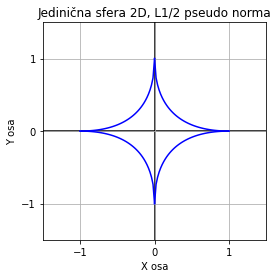

In [45]:
y=(1-x**(1/2))**2
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L1/2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

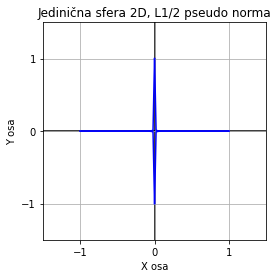

In [46]:
y=(1-x**(1/6))**6
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L1/2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

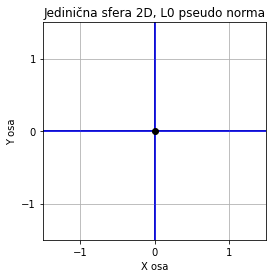

In [47]:
nula=np.array([0])
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L0 pseudo norma") 
plt.plot([-1.5,1.5],[0,0],'-b')
plt.plot([0,0],[-1.5,1.5],'-b')
plt.scatter(nula,nula,c='black', zorder=3)
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

Funkcija $L_p$ za negativne vrednosti parametra $p$ menja svoj domen. Na primer za $p=-1/2$ i vektor $v=\begin{bmatrix}x&y\end{bmatrix}\in\mathbb{R},$ imamo
$$L_{-1/2}(v)=1\quad\Longleftrightarrow\quad 
\big(|x|^{-1/2}+|y|^{-1/2}\big)^{-2}=1
\quad\Longleftrightarrow\quad
\dfrac{1}{\sqrt{|x|}}+\dfrac{1}{\sqrt{|y|}}=1
$$
$$\quad\Longrightarrow\quad |x|,|y|>1.
$$

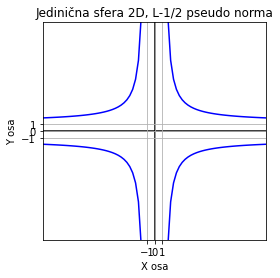

In [48]:
x=np.linspace(1+1e-10,20,50)
y=(1-x**(-1/2))**(-2)
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L-1/2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

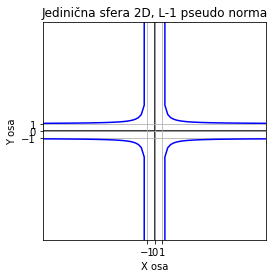

In [49]:
x=np.linspace(1+1e-10,20,50)
y=1/(1-1/x)
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L-1 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

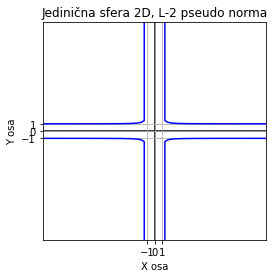

In [50]:
x=np.linspace(1+1e-10,20,50)
y=(1-x**(-2))**(-1/2)
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L-2 pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

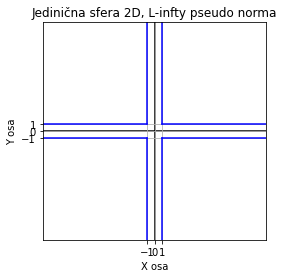

In [51]:
x=np.array([1,1])
y=np.array([1,15])
plt.figure(figsize=plt.figaspect(1))
plt.title("Jedinična sfera 2D, L-infty pseudo norma") 
plt.plot(x,y,'b')
plt.plot(x,-y,'b')
plt.plot(-x,y,'b')
plt.plot(-x,-y,'b')
plt.plot(y,x,'b')
plt.plot(-y,x,'b')
plt.plot(y,-x,'b')
plt.plot(-y,-x,'b')
plt.xlabel('X osa')
plt.ylabel('Y osa')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.axhline(color='black', zorder=-1)
plt.axvline(color='black', zorder=-1)
plt.grid();

**Задатак 1.** За вектор $v\in\mathbb{R}^n$ кажемо да је ненегативан уколико су све његове компоненте ненегативни бројеви. То ћемо означавати краће $v\geq0.$ 

а) Показати да за $v,u\in\mathbb{R}^n,$ $v,u\geq0$ важи $v\cdot u\geq0.$ 

б) Описати ситуацију када за ненегативне векторе $v\geq0$ и $u\geq0$ важи ортогоналност, тј. да је $v\cdot u=0.$ Ваш одговор треба да буде у контексту шаблона појављивања нула међу компонентама ових вектора.

**Решење :**

а) Уведимо ознаке координата вектора $v,u\in\mathbb{R}^n,$
$$v=\begin{bmatrix}v_1&v_2&\dots&v_n\end{bmatrix}^T,\quad v_i\geq0,\qquad\qquad
u=\begin{bmatrix}u_1&u_2&\dots&u_n\end{bmatrix}^T,\quad u_i\geq0.$$
Тада је $v_iu_i\geq0,\ \forall i\quad\Longrightarrow\quad v\cdot u=\displaystyle\sum_{i=1}^nv_iu_i\geq0.$

б) Израз $v\cdot u=\displaystyle\sum_{i=1}^nv_iu_i=0$ акко је $v_iu_i=0,\ \forall i.$ Закључујемо да бар једна од вредности компоненти вектора $v$ и $u$ мора да буде једнака нули у сваком од ових производа. Другим речима, уколико је компонента $v_i>0$ тада мора да буде $u_i=0,$ и обрат. Појављивање ненула вредности у компоненетама ових вектора једну другу искључује. На тај начин постоји одређена повезаност између карактеристика које ови вектори описују.

**Задатак 2.** Посматраћемо утицај повећања димензије векторског простора на угао између вектора $\mathbb{1}_n\in\mathbb{R}^n$ и вектора канонске базе $\{e_1,e_2,\dots.e_n\}$ простора $\mathbb{R}^n:$
$$\mathbb{1}_n=\begin{bmatrix}1&1&\dots&1\end{bmatrix}^T$$

а) У простору $\mathbb{R}^2,$ посматрано у односу на Декартов координатни систем, линија која полови први квадрант тј. вектор $\mathbb{1}_2=\begin{bmatrix}1&1\end{bmatrix}^T$ гради углове од $45^o$ са сваком од координатних оса. Координатне осе одређене су канонском базом
$$e_1=\begin{bmatrix}1&0\end{bmatrix}^T,\qquad e_2=\begin{bmatrix}0&1\end{bmatrix}^T.$$
Показати ово тврђење израчунавањем косинуса углова.
<div>
   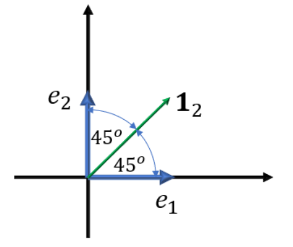  
</div>

**Решење a):**

In [52]:
kosugla=1/np.sqrt(2)
np.arccos(kosugla)   #ugao u radijanima

0.7853981633974484

In [53]:
np.arccos(kosugla)*180/np.pi   #ugao u stepenima

45.00000000000001

б) У простору $\mathbb{R}^3$ које углове заклапа вектор $\mathbb{1}_3=\begin{bmatrix}1&1&1\end{bmatrix}^T$ са сваким од вектора канонске базе $$e_1=\begin{bmatrix}1&0&0\end{bmatrix}^T,\qquad e_2=\begin{bmatrix}0&1&0\end{bmatrix}^T,\qquad e_3=\begin{bmatrix}0&0&1\end{bmatrix}^T?$$
Приметимо да вектор $\mathbb{1}_3$ представља дијагонални вектор првог октанта.
<div>
   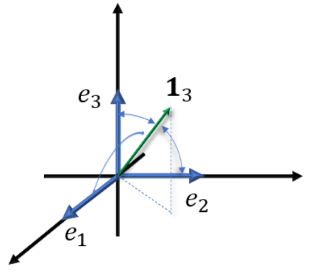  
</div>

**Решење б):**

In [54]:
kosugla=1/np.sqrt(3)
np.arccos(kosugla) #ugao u radijanima

0.9553166181245092

In [55]:
np.arccos(kosugla)*180/np.pi  #ugao u stepenima

54.735610317245346

в) Колико ће износити углови између вектора  $\mathbb{1}_{10}\in\mathbb{R}^{10}$ и вектора канонске базе $\{e_1,e_2,\dots,e_{10}\}?$ Колико ће такви углови износити за димензије $n=100$ и $n=1000?$ Шта ће се догодити ако наставимо да повећавамо димензију простора?

**Решење в):**

$n=10:\quad$ $\cos\angle(\mathbb{1}_{10},e_k)=\dfrac{\mathbb{1}_{10}\cdot e_k}{\|\mathbb{1}_{10}\|\,\|e_k\|}=\dfrac{1}{\sqrt{10}}$

In [56]:
kosugla=1/np.sqrt(10)
np.arccos(kosugla)

1.2490457723982544

In [57]:
np.arccos(kosugla)*180/np.pi

71.56505117707799

$n=100:\quad$ $\cos\angle(\mathbb{1}_{100},e_k)=\dfrac{\mathbb{1}_{100}\cdot e_k}{\|\mathbb{1}_{100}\|\,\|e_k\|}=\dfrac{1}{\sqrt{100}}$

In [58]:
kosugla=1/np.sqrt(100)
np.arccos(kosugla)

1.4706289056333368

In [59]:
np.arccos(kosugla)*180/np.pi

84.26082952273322

$n=1000:\quad$ $\cos\angle(\mathbb{1}_{1000},e_k)=\dfrac{\mathbb{1}_{1000}\cdot e_k}{\|\mathbb{1}_{1000}\|\,\|e_k\|}=\dfrac{1}{\sqrt{1000}}$

In [60]:
kosugla=1/np.sqrt(1000)
np.arccos(kosugla)

1.539168277357325

In [61]:
np.arccos(kosugla)*180/np.pi

88.18784625299604

Закључујемо да са порастом димензије косинус угла између посматарних вектора тежи нули. То значи да вредност угла тежи $90^o.$

г) Колико има различитих вектора простора $\mathbb{R}^n$  чије компоненте представљају неки низ бројева из скупа $\{-1,1\}.$
На пример, за $n=2$ то су вектори:
$$\begin{bmatrix}1\\1\end{bmatrix},\begin{bmatrix}1\\-1\end{bmatrix},\begin{bmatrix}-1\\1\end{bmatrix},\begin{bmatrix}-1\\-1\end{bmatrix}.$$
За $n=3$ то су вектори:
$$\begin{bmatrix}1\\1\\1\end{bmatrix},\begin{bmatrix}1\\1\\-1\end{bmatrix},\begin{bmatrix}1\\-1\\1\end{bmatrix},\begin{bmatrix}-1\\1\\1\end{bmatrix},\begin{bmatrix}1\\-1\\-1\end{bmatrix},\begin{bmatrix}-1\\1\\-1\end{bmatrix},\begin{bmatrix}-1\\-1\\1\end{bmatrix}\begin{bmatrix}-1\\-1\\-1\end{bmatrix}.$$

Какве ће углове заузимати ови вектори са векторима канонске базе простора $\mathbb{R}^n$ за велике вредности $n?$

**Решење г):** Број тражених вектора у простору $\mathbb{R}^n$ је $2^n.$

Нека је $v\in\{-1,1\}^n$ један такав вектор. Имајући у виду да је $v\cdot e_i=\pm\dfrac{1}{\sqrt{n}}\to0,\ n\to\infty,$ закључујемо да ће вектори  $v$ бити скоро ортогонални на векторе канонске базе. 

**Закључак:** Повећање димензије векторског простора доводи до појаве великог броја скоро ортогоналних вектора, тј. скоро ортогоналних праваца. Уочавамо разређење простора. Ова појава спада у категорију [клетве димензионалности](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

**Пример 8.** Када вектори носе нумеричке податке, превелики број компоненти у подацима често носи информације које нису важне за конкретан проблем који се решава. Другим речима, велики број димензија носи и димензије које нису релевантне или које понављају већ постојеће информације. Такви делови података могу утицати на алгоритме за њихову обраду да буду неефикасни како у времену извршења тако и у квалитету резултата које пружају. Један од разлога за лош излаз алгоритама за обраду података приликом примене над великодимензионналним подацима лежи у томе што се "геометрија" високо димензионалних простора понаша другачије од нашег очекивања. Наиме, уобичајене мере растојања и сличности података у високим димензијама губе свој смисао јер почињу да мере готово једнаке вредности - подаци делују готово еквидистантно и међусобно су ретко распоређени - још једна карактеристика која се додаје клетви димензионалности. 

Описану појаву приказаћемо графички на примеру повећања димензије простора са $1,$ на редом $2$ и $3.$ Експеримент се састоји у креирању скупа од $30$ случајно генерисаних података простора $3D.$ Координате података биране су из скупа $[0,3]$ и пратићемо опадање густине података у јединичној коцки простора наведених димензија
$$C_d=[0,1]^d\subset\mathbb{R}^d,\quad d=1,2,3.$$ 

На првој слици приказан је распоред података на $x-$оси. На наредној су подаци дати у $xy-$равни према првим двема компонентама. Трећа слика даје распоред података у $3D.$ Црвеном бојом означени су елементи сваке од јединачних коцки $C_1\subset\mathbb{R},\ C_2\subset\mathbb{R}^2$ и $C_3\subset\mathbb{R}^3.$

In [62]:
x=rndm.uniform(0,3,30)
y=rndm.uniform(0,3,30)
z=rndm.uniform(0,3,30)

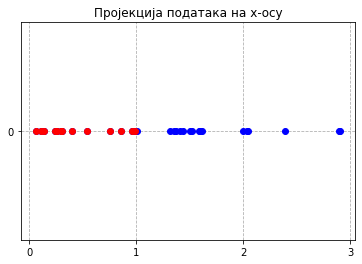

In [63]:
indeksi1=(x<=1)
nule=np.zeros(30)
plt.plot(x,nule,'ob')
plt.plot(x[indeksi1],nule[indeksi1],'or')
plt.title("Пројекција података на x-осу")
plt.xticks([0,1,2,3])
plt.yticks([0])
plt.grid(linestyle='--');

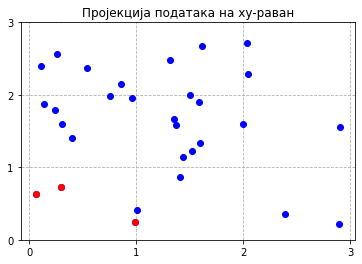

In [64]:
indeksi2=(x<=1)&(y<=1)
plt.plot(x,y,'ob')
plt.plot(x[indeksi2],y[indeksi2],'or')
plt.title("Пројекција података на xy-раван")
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.grid(linestyle='--');

<IPython.core.display.Javascript object>


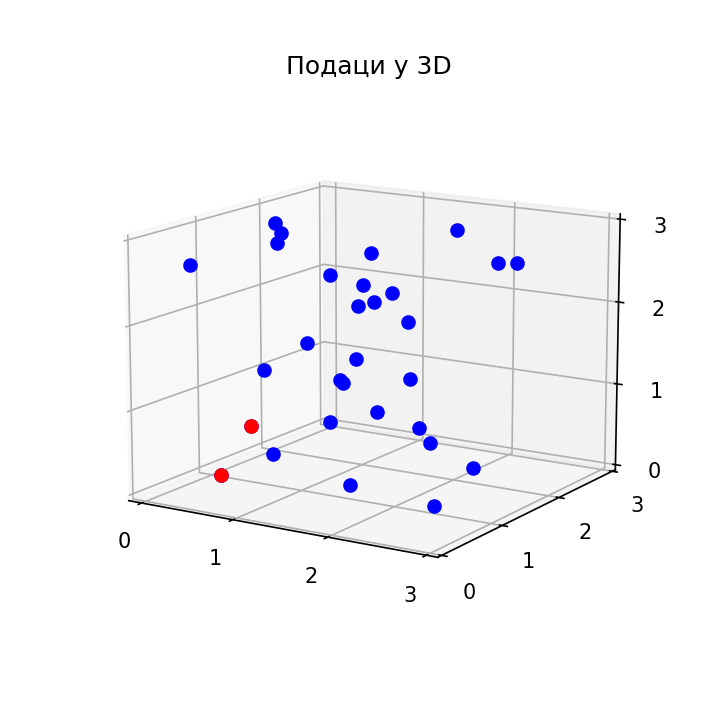

In [65]:
%matplotlib notebook 
indeksi3=(x<=1)&(y<=1)&(z<=1)
slika = plt.figure(figsize=plt.figaspect(1))
ax = slika.add_subplot(projection='3d')
plt.title("Подаци у 3D")
ax.plot(x,y,z, 'ob')
ax.plot(x[indeksi3],y[indeksi3],z[indeksi3], 'or')
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
ax.set_zticks([0,1,2,3]);

In [66]:
%matplotlib inline 

**Задатак 3.** Користећи Шварцову неједнакост доказати неједнакост троугла за реалне векторе $v$ и $u$.

**Решење:**

Шварцова неједнакост: $|v\cdot u|\leq\|v\|\,\|u\|\quad\Longrightarrow\quad
v\cdot u\leq\|v\|\,\|u\|.$
\begin{align}
    &\|u+v\|\leq\|u\|+\|v\|\quad\Longleftrightarrow\quad
    \|u+v\|^2\leq(\|u\|+\|v\|)^2=\|u\|^2+\|v\|^2+2\|u\|\,\|v\|,\\[6pt]
    &\|u+v\|^2=(u+v)\cdot(u+v)=u\cdot u+v\cdot v
    +2v\cdot u\\
    &\phantom{\|u+v\|^2}=\|u\|^2+\|v\|^2+2v\cdot u
    \leq\|u\|^2+\|v\|^2+2\|v\|\,\|u\|.
\end{align}

**Задатак 4.** Показати да за $x_1,x_2,\dots,x_n\in\mathbb{R}$ важи   
$$(x_1+x_2+\dots+x_n)^2\leq n(x_1^2+x_2^2+\dots+x_n^2).$$

**Решење:**

Шварцова неједнакост гласи
$$|u\cdot v|\leq\|u\|\,\|v\|.$$
Њеним квадрирањем добијамо
\begin{align}
(u\cdot v)^2&\leq\|u\|^2\,\|v\|^2. \label{kvkosi}\tag{1}
\end{align}
Уведимо ознаке координата вектора
\begin{align}
    u&=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T,
    &&\mathbb{1}=\begin{bmatrix} 1&1&\dots&1\end{bmatrix}^T\in\mathbb{R}^n.
\end{align}
Тада је
\begin{align}
    (u\cdot \mathbb{1})^2&=(x_1+x_2+\dots+x_n)^2,\\
    \|u\|^2&=x_1^2+x_2^2+\dots+x_n^2,\\
    \|\mathbb{1}\|^2&=n.
\end{align}
Применом неједнакости (\ref{kvkosi}) за векторе $u$ и $\mathbb{1}$ добијамо
$$(x_1+x_2+\dots+x_n)^2\leq n(x_1^2+x_2^2+\dots+x_n^2).$$

**Задатак 5.** Доказати да за све векторе $v\in\mathbb{R}^n$ важи да је 
	$$\|v\|_{\infty}\leq\|v\|_2\leq\|v\|_1.$$

**Решење :**

Означимо координате вектора $v\in\mathbb{C}^n$ са
$$v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T.$$
\begin{align}
   \|v\|_{\infty}&=\displaystyle\max_{k}\{|x_k|\}=\sqrt{\left(\displaystyle\max_{k}\{|x_k|\}\right)^2}\leq
   \sqrt{\displaystyle\sum_{k=1}^n|x_k|^2}=\|v\|_2\\
   &\leq\sqrt{\left(\displaystyle\sum_{k=1}^n|x_k|\right)^2}\leq
   \displaystyle\sum_{k=1}^n|x_k|=\|v\|_1.
\end{align}

**Задатак 6.** Показати да за три истакнуте норме $L_1,\ L_2$ и $L_{\infty}$ важи 
$$\forall p,q\in\{1,2,\infty\},\ p\neq q, \quad\|v\|_p\leq\alpha_{pq}\|v\|_q,\quad 
	[\alpha_{pq}]=\!\!\!\begin{array}{rl}
	& \phantom{i}1\phantom{ww} 2\phantom{wwi} \infty\\
	\begin{array}{r} 1\\2\\ \infty\end{array}\!\!\!&\!\!\!
	\begin{bmatrix} &\sqrt{n}&n\\
	1&&\sqrt{n}\\1&1&\end{bmatrix}
	\end{array}.$$

**Решење :**

Означимо координате вектора $v\in\mathbb{R}^n$ са $v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T.$

$\underline{p=1,\ q=2 :}$ Показаћемо да је $\|v\|_1\leq\sqrt{n}\|v\|_2.$
\begin{align}
\|v\|_1&=\displaystyle\sum_{k=1}^n|x_k|=\displaystyle\sum_{k=1}^n{\rm sgn}(x_k)x_k
         =|u\cdot v|, \mbox{ за }
         u=\begin{bmatrix}{\rm sgn}(x_1)&{\rm sgn}(x_2)&\dots&{\rm sgn}(x_n)\end{bmatrix}^T,
\end{align}
где је ${\rm sgn}(x)\in\{-1,0,1\}.$ На основу Шварцове неједнакости је тада 
$$\|v\|_1=|u\cdot v|\leq\|u\|_2\,\|v\|_2\leq\sqrt{n}\|v\|_2.$$
     
$\underline{p=1,\ q=\infty :}$ Показаћемо да је $\|v\|_1\leq n\|v\|_{\infty}.$
\begin{align}
         \|v\|_1&=\displaystyle\sum_{k=1}^n|x_k|\leq\displaystyle\sum_{k=1}^n\max\{|x_k|\}
         =n\max\{|x_k|\}= n\|v\|_{\infty}.
\end{align}     
     
$\underline{p=2,\ q=\infty :}$ Показаћемо да је $\|v\|_2\leq\sqrt{n}\|v\|_{\infty}.$
\begin{align}
         \|v\|_2&=\sqrt{\displaystyle\sum_{k=1}^nx_k^2}
         \leq\sqrt{\displaystyle\sum_{k=1}^n\max\{x_k\}^2}
         =\sqrt{n\max\{x_k\}^2}= \sqrt{n}\,\|v\|_{\infty}.
\end{align}       
     
$\underline{p=2,\ q=1\text{ и }p=\infty,\ q\in\{1,2\} :}$ задатак 5.

## Статистичке карактеристике вектора

У дефиницијама и задацима који следе коришћене су ознаке: $\mathbb{1}=\begin{bmatrix}1&1&\dots&1\end{bmatrix}^T\in\mathbb{R}^n\quad$ и $\quad v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T\in\mathbb{R}^n.$
-  Средње-квадратна норма: $$\|v\|_{sr}=\sqrt{\dfrac{x_1^2+x_2^2+\dots+x_n^2}{n}}
  	=\dfrac{\|v\|}{\sqrt{n}}=\sqrt{\dfrac{v^Tv}{n}}
  	=\sqrt{\dfrac{v^Tv}{\mathbb{1}^T\mathbb{1}}}\,.$$
-  Средња вредност: $$\mu(v)=\dfrac{x_1+x_2+\dots+x_n}{n}=\dfrac{\mathbb{1}^Tv}{n}=\dfrac{\mathbb{1}^Tv}{\mathbb{1}^T\mathbb{1}}.$$
-  Стандардно одступање: $$\sigma(v)=\sqrt{\dfrac{(x_1-\mu(v))^2+(x_2-\mu(v))^2+\dots+(x_n-\mu(v))^2}{n}}\,.$$
$$\sigma(v)=\|v-\mu(v)\mathbb{1}\|_{sr}=\Big\|v-\dfrac{\mathbb{1}^Tv}{\mathbb{1}^T\mathbb{1}}e\Big\|_{sr}
  	=\dfrac{\|v-\frac1n(\mathbb{1}^Tv)\mathbb{1}\|}{\sqrt{n}}.$$
-  Варијанса :    $$Var(v)=\sigma^2(v)=\dfrac{(x_1-\mu(v))^2+(x_2-\mu(v))^2+\dots+(x_n-\mu(v))^2}{n}=\|v-\mu(v)\mathbb{1}\|_{sr}^2.$$

Средња вредност је добра процена централне тенденције података, уколико таква тенденција постоји. Централна тенденција значи да се највећи број података налази близу неке карактеристичне вредности. Стандардно одступање и варијанса су мере којима се описује распрострањеност података око средње вредности. Стандардно одступање представља карактеристиу која је мање диригована екстремима у скупу података. Средња вредност и варијанса су карактеристике веома остељиве на екстреме.

**Пример 9.** Упознаћемо уграђене функције NumPy-а за одређивање [статистичких](https://numpy.org/devdocs/reference/routines.statistics.html) карактеристика вектора вредности. Наведене наредбе могу да се користе као функције или методи.

In [67]:
v=np.arange(10)
mu=np.mean(v)   #srednja vrednost komponeneti vektora
mu

4.5

In [68]:
n=v.size
np.sum(v)/n

4.5

Осим тога приликом израчунавања средње вредности можемо појединим компонентама вектора да дамо већи значај у односу на неку другу компоненту. То се постиже увођењем тежина у израз за средњу вредност, 
$$\mu_w(v)=\dfrac{w_1x_1+w_2x_2+\dots+w_nx_n}{w_1+w_2+\dots+w_n}=\dfrac{w^Tv}{w^T\mathbb{1}},$$
$$v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T,\qquad w=\begin{bmatrix} w_1&w_2&\dots&w_n\end{bmatrix}^T,\quad w_i>0.$$

In [69]:
tezine=rndm.normal(2,1,10)
np.average(v,weights=tezine)  #racuna tezinsku srednju vrednost komponenti vektora

4.2857437176960635

In [70]:
np.dot(tezine,v)/np.sum(tezine)

4.285743717696064

За стандардно одступање и варијансу такође постоје уграђене функције.

In [71]:
np.std(v)   #standardno odstupanje

2.8722813232690143

In [72]:
np.sqrt(np.mean((v-mu)**2))

2.8722813232690143

In [73]:
np.var(v)   #varijansa

8.25

In [74]:
np.mean((v-mu)**2)

8.25

Ове наредбе могу да се користе и над вишедимензионалним низовима. Одговарајуће карактеристике вектора могу да се израчунавају над целим низом након његове векторизације, или дуж појединих оса.

In [75]:
A=rndm.rand(25,10)
np.mean(A)  #srednja vrednost celokupnog sadrzaja matrice

0.4902872780379505

In [76]:
np.mean(A,axis=0)  #srednje vrednosti vektora-kolona

array([0.53992266, 0.49951375, 0.44899706, 0.51024061, 0.48844635,
       0.50564185, 0.58759461, 0.4127126 , 0.45191785, 0.45788543])

In [77]:
np.mean(A,axis=1)  #srednje vrednosti vektora-vrsta

array([0.52262074, 0.50474287, 0.42341192, 0.27300967, 0.43543185,
       0.39131869, 0.39587199, 0.46112394, 0.5222012 , 0.5807444 ,
       0.55219553, 0.53802816, 0.67718367, 0.56577775, 0.46704962,
       0.46927076, 0.41214539, 0.69849473, 0.44489693, 0.49656501,
       0.43613897, 0.48133469, 0.52330961, 0.46514659, 0.51916725])

In [78]:
A=A.reshape(5,5,10)  #trodimenzionalni tenzor
np.mean(A)

0.4902872780379505

In [79]:
np.mean(A,axis=0)

array([[0.41639094, 0.46170495, 0.42205001, 0.44133939, 0.30279548,
        0.52094308, 0.68172036, 0.52241101, 0.43891749, 0.53481668],
       [0.51116209, 0.37194833, 0.3382634 , 0.45859954, 0.35400952,
        0.53850387, 0.43233363, 0.49802772, 0.67812126, 0.48327687],
       [0.63497541, 0.7056823 , 0.56677689, 0.51752054, 0.44854045,
        0.53577388, 0.5860643 , 0.49774529, 0.62442434, 0.44954434],
       [0.50962381, 0.45838674, 0.60351389, 0.31681519, 0.5039242 ,
        0.4451601 , 0.69937006, 0.32717289, 0.27335911, 0.40473829],
       [0.62746106, 0.49984644, 0.31438113, 0.81692839, 0.8329621 ,
        0.48782834, 0.5384847 , 0.21820611, 0.24476703, 0.41705098]])

In [80]:
np.mean(A,axis=(0,1))

array([0.53992266, 0.49951375, 0.44899706, 0.51024061, 0.48844635,
       0.50564185, 0.58759461, 0.4127126 , 0.45191785, 0.45788543])

In [81]:
np.mean(A,axis=(1,2))

array([0.43184341, 0.47025204, 0.56004695, 0.50427456, 0.48501942])

У стандардне статистичке карактеристике низа вредности спадају још и распон вредности, [перцентил](https://sr.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BD%D1%82%D0%B8%D0%BB) и [медијана](https://sr.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D1%98%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)).
-  Распон вредности представља разлику између максималне и минималне вредности низа. Указује колико највише међусобно одступају вредности унутар вектора.
-  Перцентил је број који је граница првих $p\in[0,100]$ посто компоненти вектора када се оне поређају у неопадајући низ. 
- Медијана је вредност која одваја доњу половину компоненти од горње половине компоненти. Медијана коначног низа бројева је средњи члан низа када се бројеви поређају по величини. Еквивалентна је $50-$том перцентилу.
- Мод или [модус](https://sr.m.wikipedia.org/sr/Modus_(statistika)) је вредност компоненте која се највише појављује, када је таква компонента јединствена. Тада мод можемо да узмемо као меру централне тенденције. У случају када се све вредности понављају једнак број пута мод не постоји. Уколико постоје две (или више) вредности са доминантним фреквенцијама, за скуп вредности кажемо да је бимодалан (тримодалан, вишемодалан,...). Тада мод не узимамо као меру централне тенденције скупа вредности. Понекад таква појава може да сугерише два или више подскупова вредности које би требало овојено посматрати. 

Још Python функционалности из области дескриптивне статистике може да се пронађе у модулу [statistics](https://docs.python.org/3/library/statistics.html).

In [82]:
np.ptp(v)  #raspon vrednosti

9

In [83]:
np.max(v)-np.min(v)

9

In [84]:
A=A.reshape(50,5)
np.ptp(A)

0.9788588950499366

In [85]:
np.ptp(A,axis=0)

array([0.9150875 , 0.9788589 , 0.97463234, 0.87574045, 0.92899968])

In [86]:
np.max(A,axis=0)-np.min(A,axis=0)

array([0.9150875 , 0.9788589 , 0.97463234, 0.87574045, 0.92899968])

In [87]:
np.percentile(v,30)  # pokazuje koja je vrednost ispod koje se nalazi 30% komponenti vektora

2.6999999999999997

In [88]:
np.median(v)   #medijana

4.5

In [89]:
np.percentile(v,50)  # pokazuje koja je vrednost ispod koje se nalazi 30% komponenti vektora

4.5

In [90]:
v=rndm.randint(0,5,30)
v

array([3, 3, 1, 2, 1, 1, 1, 3, 2, 3, 1, 0, 3, 1, 3, 3, 0, 4, 1, 1, 0, 2,
       0, 4, 1, 3, 0, 1, 1, 3])

Наредбе којима можемо да добијемо дистрибуцију фреквенција у низу вредности су `bincount`, `histogramdd` и `histogram`, а за графички приказ таквих података користимо хистограме. 

In [91]:
np.bincount(v)  #broj podeonih intervala je max_vrednost+1, za svaku pojedinačnu vrednost se utvrđuje frekvencija

array([ 5, 11,  3,  9,  2], dtype=int64)

Видимо да највећу фреквенцију понављања има вредност $3,$ и она представља модус.

In [92]:
np.histogramdd(v,3)  #broj podeonih intervala se rucno unosi, ili granice podeonih intervala

(array([16.,  3., 11.]),
 [array([0.        , 1.33333333, 2.66666667, 4.        ])])

Највећи број вредности долази из опсега $[2.67,4]$ па за модус можемо да узмемо средину овог интервала.

**Пример 10.** Случајне променљиве које имају тенденцију нагомилавања вредности око једне карактеристичне вредности су унимодалне. Међу њима посебно место заузимају аслучајне променљиве чији хисторам има карактеристике симетричности и обликом подсећа на график функције Гаусовог звона
$$ f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2},\qquad x\in\mathbb{R}.$$
Карактеристична вредност око које случајна променљива има тенденцију нагомилавања добро се апроксимира средњом вредношћу $\mu.$ Највећи број реализација овакве случајјне променљиве дешава се у опсегу $[\mu-\sigma,\mu+\sigma].$ За такве случајне променљиве кажемо да подлежу нормалној расподели. У статистици познато је емпиријско правило три сигме. Њиме се исказује да готово све вредности које подлежу нормалној дистрибуцији се реализују унутар сегмента $[\mu-3\sigma,\mu+3\sigma],$ где је $\mu$ очекивана вредност дистрибуције, а $\sigma$ њено стандардно одступање.

<div>
   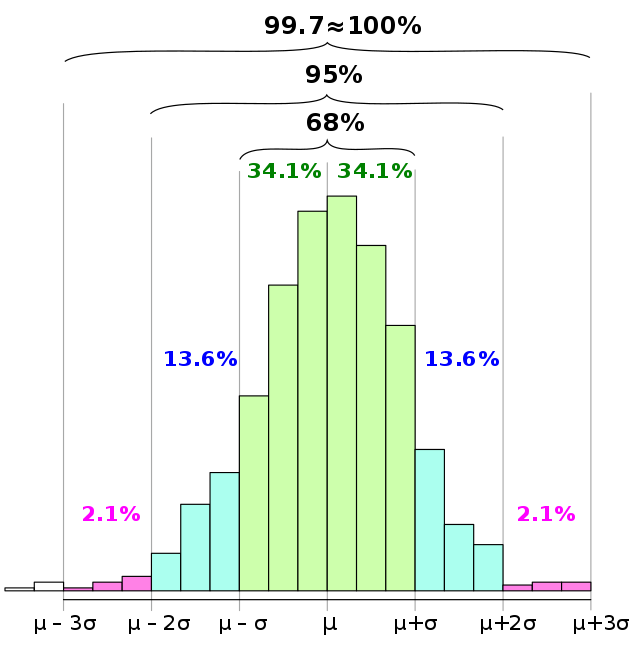  
</div>

In [93]:
mu, sigma=5,3
vrednosti=rndm.normal(mu,sigma,98765)
frekvencije, granice=np.histogram(vrednosti, 30)
print(frekvencije)
print(granice)

[    2     2    14    37    90   189   471   907  1676  2871  4488  6387
  8304 10160 11140 11511 10845  9059  7174  5327  3526  2136  1208   680
   310   159    61    23     4     4]
[-8.29839234 -7.425243   -6.55209365 -5.6789443  -4.80579495 -3.9326456
 -3.05949626 -2.18634691 -1.31319756 -0.44004821  0.43310113  1.30625048
  2.17939983  3.05254918  3.92569852  4.79884787  5.67199722  6.54514657
  7.41829592  8.29144526  9.16459461 10.03774396 10.91089331 11.78404265
 12.657192   13.53034135 14.4034907  15.27664004 16.14978939 17.02293874
 17.89608809]


In [94]:
relativne_frekvencije, granice=np.histogram(vrednosti, 30, density=True)
print(relativne_frekvencije)
print(granice)

[2.31920102e-05 2.31920102e-05 1.62344072e-04 4.29052189e-04
 1.04364046e-03 2.19164497e-03 5.46171841e-03 1.05175766e-02
 1.94349046e-02 3.32921307e-02 5.20428709e-02 7.40636846e-02
 9.62932264e-02 1.17815412e-01 1.29179497e-01 1.33481615e-01
 1.25758675e-01 1.05048210e-01 8.31897407e-02 6.17719192e-02
 4.08875140e-02 2.47690669e-02 1.40079742e-02 7.88528347e-03
 3.59476158e-03 1.84376481e-03 7.07356312e-04 2.66708118e-04
 4.63840204e-05 4.63840204e-05]
[-8.29839234 -7.425243   -6.55209365 -5.6789443  -4.80579495 -3.9326456
 -3.05949626 -2.18634691 -1.31319756 -0.44004821  0.43310113  1.30625048
  2.17939983  3.05254918  3.92569852  4.79884787  5.67199722  6.54514657
  7.41829592  8.29144526  9.16459461 10.03774396 10.91089331 11.78404265
 12.657192   13.53034135 14.4034907  15.27664004 16.14978939 17.02293874
 17.89608809]


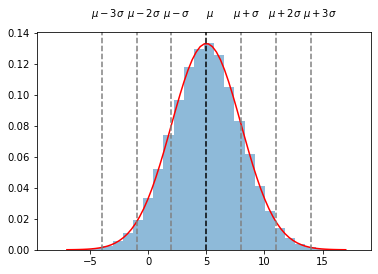

In [95]:
plt.hist(vrednosti,30, density=True,alpha=0.5)
x = np.linspace(mu-4*sigma, mu+4*sigma, 70)
y = np.exp(-((x-mu)/sigma)**2/2)/(sigma*np.sqrt(2*np.pi))
plt.plot(x, y,'-r')
plt.axvline(x=mu,linestyle='--', color='black');
plt.axvline(x=mu+sigma,linestyle='--', color='gray')
plt.axvline(x=mu+2*sigma,linestyle='--', color='gray')
plt.axvline(x=mu+3*sigma,linestyle='--', color='gray')
plt.axvline(x=mu-sigma,linestyle='--', color='gray')
plt.axvline(x=mu-2*sigma,linestyle='--', color='gray')
plt.axvline(x=mu-3*sigma,linestyle='--', color='gray')
plt.text(mu, 0.15, r'$\mu$');
plt.text(mu+sigma-0.7, 0.15, r'$\mu+\sigma$')
plt.text(mu+2*sigma-0.7, 0.15, r'$\mu+2\sigma$')
plt.text(mu+3*sigma-0.7, 0.15, r'$\mu+3\sigma$')
plt.text(mu-sigma-0.7, 0.15, r'$\mu-\sigma$')
plt.text(mu-2*sigma-0.8, 0.15, r'$\mu-2\sigma$')
plt.text(mu-3*sigma-0.9, 0.15, r'$\mu-3\sigma$');

In [96]:
vrednosti.mean()

4.998862216814148

In [97]:
vrednosti.std()

2.9962877169741695

Проверићемо правило три сигме, познато још и као правило $68-95-99.7.$

In [98]:
relativne_frekvencije, granice=np.histogram(vrednosti, mu+np.arange(-4,5)*sigma, density=True)
print(relativne_frekvencije)
print(granice)

[0.00044216 0.00705435 0.04531662 0.11382484 0.1138721  0.04518836
 0.00718599 0.00044891]
[-7 -4 -1  2  5  8 11 14 17]


In [99]:
sirina=granice[1]-granice[0]

In [100]:
np.sum(relativne_frekvencije[3:5])*sirina

0.6830908188786617

In [101]:
np.sum(relativne_frekvencije[2:6])*sirina

0.9546057494658606

In [102]:
np.sum(relativne_frekvencije[1:7])*sirina

0.9973267717731401

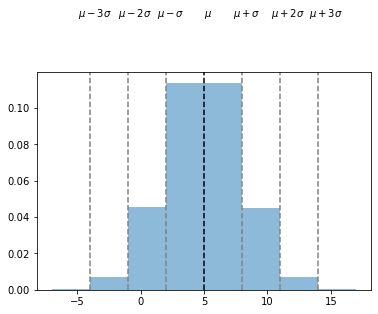

In [103]:
plt.hist(vrednosti, mu+np.arange(-4,5)*sigma, density=True,alpha=0.5)
plt.axvline(x=mu,linestyle='--', color='black');
plt.axvline(x=mu+sigma,linestyle='--', color='gray')
plt.axvline(x=mu+2*sigma,linestyle='--', color='gray')
plt.axvline(x=mu+3*sigma,linestyle='--', color='gray')
plt.axvline(x=mu-sigma,linestyle='--', color='gray')
plt.axvline(x=mu-2*sigma,linestyle='--', color='gray')
plt.axvline(x=mu-3*sigma,linestyle='--', color='gray')
plt.text(mu, 0.15, r'$\mu$');
plt.text(mu+sigma-0.7, 0.15, r'$\mu+\sigma$')
plt.text(mu+2*sigma-0.7, 0.15, r'$\mu+2\sigma$')
plt.text(mu+3*sigma-0.7, 0.15, r'$\mu+3\sigma$')
plt.text(mu-sigma-0.7, 0.15, r'$\mu-\sigma$')
plt.text(mu-2*sigma-0.8, 0.15, r'$\mu-2\sigma$')
plt.text(mu-3*sigma-0.9, 0.15, r'$\mu-3\sigma$');

Код случајних променљивих са унимодалном расподелом фреквенција, очекивана вредност може да се апроксимира средњом вредношћу, модом или медијаном. Избор адекватног израза зависи од конкретне расподеле фреквенција реализација те случајне променљиве. Реп расподеле фреквенција представља њен део који се односи на реализацију доминантних вредности (веома позитивни или веома негативни бројеви). Реп има утицај на формулу средње вредности $\mu.$ Због тога код "дебелих " репова расподеле фреквенција препорука је да се користи мод или медијана. Уколико дистрибуција не показује карактеристике симетричности мод је боља опција.

Асиметричност дистрибуције обично се мери изразом 
$$Skew=\dfrac{(x_1-\mu)^3+(x_2-\mu)^3+\dots+(x_n-\mu)^3}{n\,\sigma^3},$$
где су $\mu$ и $\sigma$ средња вредност и стандардно одступање. Уколико је $Skew$ позитивна вредност то указује на дебљину репа са десне стране, док негативна вредност овог коефицијента указује на дебео негативан део репа. Позитивна или негативна вредност $Skew$ карактеристике треба свакако да прелази $\sqrt{6/n}$ да би описивала асиметричност.
<div>
   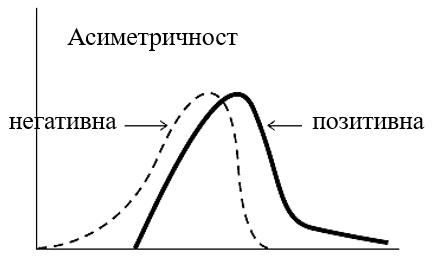  
</div>

Заравњеност функције у околини очекиване вредности може се описати изразом
$$K=\dfrac{(x_1-\mu)^4+(x_2-\mu)^4+\dots+(x_n-\mu)^4}{n\,\sigma^4}-3.$$
Вредност $K=0$ добија се за случајну променљиву са нормалном расподелом, тј. хистограмом који личи на Гаусово звоно. Позитивне вредности карактеристике $K$ сугеришу постојање шиљка, док негативне вредности $K$ указују на заравњеност графика хистограма.
<div>
   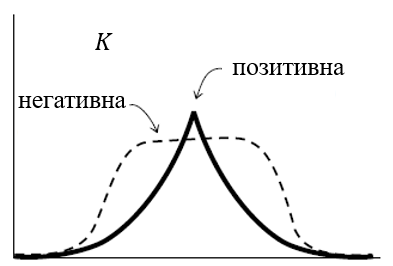  
</div>

## Центрирани и стандардизовани вектори

За вектор $v\in\mathbb{R}^n$ кажемо да је вектор стандардизованих вредности уколико има карактеристике  
\begin{align}\label{vektstnd}\tag{2}\mu(v)=0\qquad\mbox{ и }\qquad\sigma(v)=1.\end{align} 
Постоји поступак стандардизације вектора, тј. довођења вектора на облик такав да задовољава услове (\ref{vektstnd}).
-  вектор центрираних вредности вектора $v$ је $$\dot{v}=v-\mu(v)\mathbb{1},$$
-  нормиран вектор центрираних вредности вектора $v$ је $$\dot{v}^*=\dfrac{\dot{v}}{\|\dot{v}\|},$$
-  вектор стандардизованих, или нормализованих, вредности вектора $v$ је: $$\widetilde{v}=\dfrac{\dot{v}}{\sigma(v)}=\dfrac{\dot{v}}{\|\dot{v}\|_{sr}}\,.$$

Особине ових вектора су:
\begin{align}
&\mu(\dot{v})=0,&&\sigma(\dot{v})=\sigma(v),\\
&\mu(\dot{v}^*)=0,&&\sigma(\dot{v}^*)=\dfrac{1}{\sqrt{n}},\\
&\mu(\widetilde{v})=0,&&\sigma(\widetilde{v})=1.
\end{align}

**Пример 11.** Одредићемо центрирану, нормирану центрирану и стандардизовану верзију вектора $v=\begin{vmatrix}0.35&2.1&-3.1&0.47&-0.63&1.12&3.3&5.41&-3.36\end{vmatrix}^T.$

In [104]:
v=np.array([0.35,2.1,-3.1,0.47,-0.63,1.12,3.3,5.41,-3.36])
mu=np.mean(v)
sigma=np.std(v)
v_centriran=v-mu
print("srednja vrednost: ",np.round(mu,3))
print("standardno odstupanje : ",np.round(sigma,3),"\n")

print("centriran: ",v_centriran)
print("srednja vrednost centriranog v: ",np.round(v_centriran.mean(),3))
print("standardno odstupanje centriranog v: ",np.round(v_centriran.std(),3),"\n")

norma=np.linalg.norm(v_centriran)
ncv=v_centriran/norma
print("normiran centriran: ",ncv)
print("srednja vrednost normiranog centriranog v: ",np.round(ncv.mean(),3))
print("standardno odstupanje normiranog centriranog v: ",np.round(ncv.std(),3),"\n")


v_standr=v_centriran/sigma
print("standardizovan: ",v_standr)
print("srednja vrednost standardizovanog v: ",np.round(v_standr.mean(),3))
print("standardno odstupanje standardizovanog v: ",np.round(v_standr.std(),3))

srednja vrednost:  0.629
standardno odstupanje :  2.665 

centriran:  [-0.27888889  1.47111111 -3.72888889 -0.15888889 -1.25888889  0.49111111
  2.67111111  4.78111111 -3.98888889]
srednja vrednost centriranog v:  -0.0
standardno odstupanje centriranog v:  2.665 

normiran centriran:  [-0.03488759  0.18402856 -0.46646514 -0.0198762  -0.15748063  0.06143552
  0.33414249  0.59809282 -0.49898983]
srednja vrednost normiranog centriranog v:  -0.0
standardno odstupanje normiranog centriranog v:  0.333 

standardizovan:  [-0.10466277  0.55208568 -1.39939543 -0.05962859 -0.4724419   0.18430655
  1.00242748  1.79427847 -1.49696949]
srednja vrednost standardizovanog v:  -0.0
standardno odstupanje standardizovanog v:  1.0


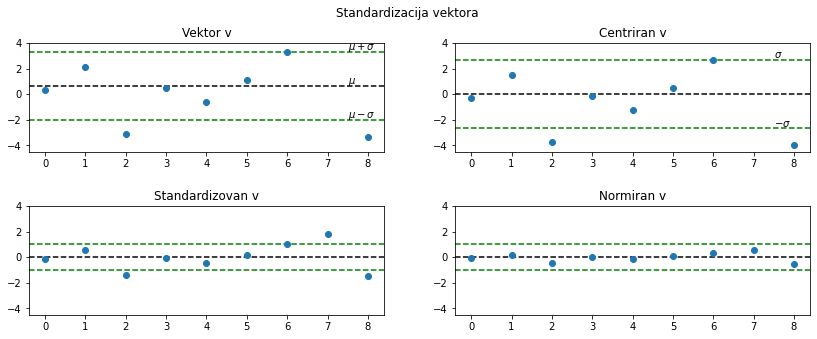

In [105]:
slika, ax = plt.subplots(2, 2,figsize=(14,5)) 
slika.suptitle('Standardizacija vektora')
slika.subplots_adjust(hspace=0.5)


plt.subplot(2, 2, 1)
plt.title("Vektor v")  
plt.plot(v,'o')
plt.axhline(y=mu,linestyle='--', color='black', zorder=-1)
plt.axhline(y=mu+sigma,linestyle='--', color='green', zorder=-1)
plt.axhline(y=mu-sigma,linestyle='--', color='green', zorder=-1)
plt.ylim([-4.5,4])
plt.text(7.5,mu+0.15, r'$\mu$');
plt.text(7.5,mu+sigma+0.15, r'$\mu+\sigma$')
plt.text(7.5,mu-sigma+0.15, r'$\mu-\sigma$');


plt.subplot(2, 2, 2)
plt.title("Centriran v")  
plt.plot(v_centriran,'o')
plt.axhline(linestyle='--', color='black', zorder=-1)
plt.axhline(y=sigma,linestyle='--', color='green', zorder=-1)
plt.axhline(y=-sigma,linestyle='--', color='green', zorder=-1)
plt.ylim([-4.5,4])
plt.text(7.5,sigma+0.15, r'$\sigma$')
plt.text(7.5,-sigma+0.15, r'$-\sigma$');


plt.subplot(2, 2, 3)
plt.title("Standardizovan v")  
plt.plot(v_standr,'o')
plt.axhline(linestyle='--', color='black', zorder=-1)
plt.axhline(y=1,linestyle='--', color='green', zorder=-1)
plt.axhline(y=-1,linestyle='--', color='green', zorder=-1)
plt.ylim([-4.5,4])

plt.subplot(2, 2, 4)
plt.title("Normiran v")  
plt.plot(ncv,'o')
plt.axhline(linestyle='--', color='black', zorder=-1)
plt.axhline(y=1,linestyle='--', color='green', zorder=-1)
plt.axhline(y=-1,linestyle='--', color='green', zorder=-1)
plt.ylim([-4.5,4]);

**Пример 12.** За колоне матрице $A$ одредићемо центрирану и стандардизовану верзију вектора-колона.

In [106]:
A=rndm.normal(-1,3,(43,7))
mu=np.mean(A,axis=0)
sigma=np.std(A,axis=0)
A_centr=A-mu
print("srednje vrednosti kolona: ",mu)
print("srednje vrednosti kolona: ",mu)
print(np.round(A_centr.mean(axis=0),3))
sigmaC=A_centr.std(axis=0)
A_stnd=A_centr/sigma
print(np.round(A_stnd.std(axis=0),3))

srednje vrednosti kolona:  [-2.03400873 -1.13122657 -0.1996862  -0.55377375 -1.83025272 -1.60684279
 -0.79151456]
srednje vrednosti kolona:  [-2.03400873 -1.13122657 -0.1996862  -0.55377375 -1.83025272 -1.60684279
 -0.79151456]
[-0.  0.  0.  0. -0.  0.  0.]
[1. 1. 1. 1. 1. 1. 1.]


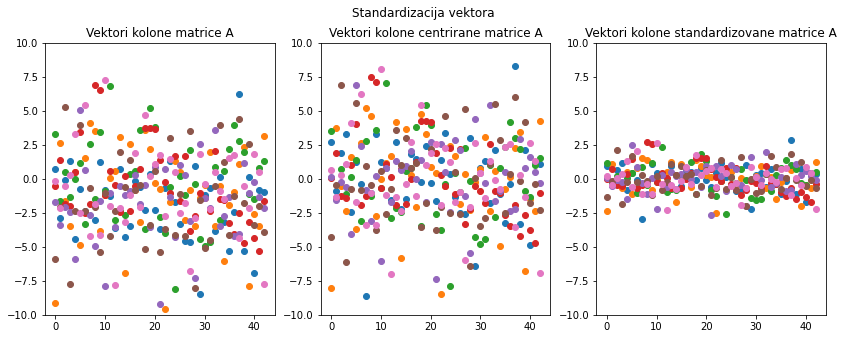

In [107]:
slika, ax = plt.subplots(1, 3,figsize=(14,5)) 
slika.suptitle('Standardizacija vektora')
slika.subplots_adjust(hspace=0.5)

plt.subplot(1, 3, 1)
plt.title("Vektori kolone matrice A")  
plt.plot(A,'o')
plt.ylim([-10,10]);

plt.subplot(1, 3, 2)
plt.title("Vektori kolone centrirane matrice A")  
plt.plot(A_centr,'o')
plt.ylim([-10,10]);

plt.subplot(1, 3, 3)
plt.title("Vektori kolone standardizovane matrice A")  
plt.plot(A_stnd,'o')
plt.ylim([-10,10]);


In [108]:
granice=np.arange(-10,11,2)
rel_frvA=np.empty((10,7))
rel_frvAC=np.empty((10,7))
rel_frvAN=np.empty((10,7))
for i in range(7):
    rel_frvA[:,i], _=np.histogram(A[:,i], granice, density=True)
    rel_frvAC[:,i], _=np.histogram(A_centr[:,i], granice, density=True)
    rel_frvAN[:,i], _=np.histogram(A_stnd[:,i], granice, density=True)

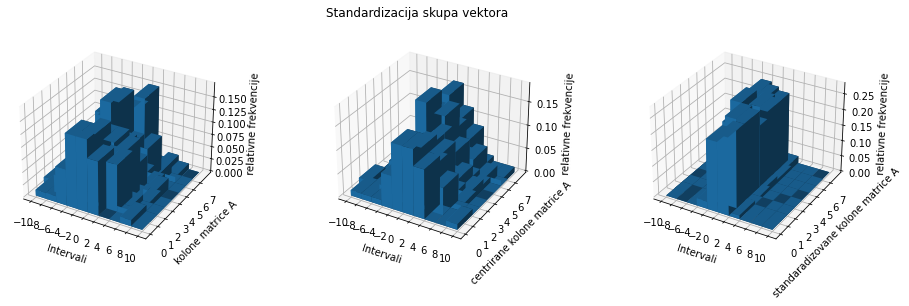

In [111]:
slika= plt.figure(figsize=(16,4)) 
slika.suptitle('Standardizacija skupa vektora')
slika.subplots_adjust(hspace=0.5)

ax1 = slika.add_subplot(131, projection='3d')
X,Y=np.meshgrid(granice[:-1],np.arange(7))
x, y = X.ravel(), Y.ravel()

topA = rel_frvA.flatten('F')
bottom = np.zeros_like(topA)
width = depth = 2

ax1.bar3d(x, y, bottom, width, depth, topA, shade=True)
ax1.set(xlabel="Intervali", ylabel="kolone matrice A", zlabel='relativne frekvencije')
ax1.set(xticks=granice, yticks=np.arange(8))

ax2 = slika.add_subplot(132, projection='3d')

topAC = rel_frvAC.flatten('F')

ax2.bar3d(x, y, bottom, width, depth, topAC, shade=True)
ax2.set(xlabel="Intervali", ylabel="centrirane kolone matrice A", zlabel='relativne frekvencije')
ax2.set(xticks=granice, yticks=np.arange(8))

ax3 = slika.add_subplot(133, projection='3d')

topAN = rel_frvAN.flatten('F')

ax3.bar3d(x, y, bottom, width, depth, topAN, shade=True)
ax3.set(xlabel="Intervali", ylabel="standaradizovane kolone matrice A", zlabel='relativne frekvencije')
ax3.set(xticks=granice, yticks=np.arange(8));

Још један начин процене садржаја вектора даје Чебишевљева неједнакост. Она важи за низ вредности без обзира на начин расподеле фреквенција вредности.

За вектор $v=\begin{bmatrix} x_1&x_2&\dots&x_n\end{bmatrix}^T\in\mathbb{R}^n$ уколико је $k<n$ компоненти овог вектора са апсолутним вредностима не мањим од $a>0,$ тада важи Чебишевљева неједнакост: 
$$
\dfrac{k}{n}\leq\left(\dfrac{\|v\|_{sr}}{a}\right)^2.
$$
У случају када Чебишевљеву неједнакост примењујемо на вектор центрираних вредности $\dot{v},$ с обзиром да је $\|\dot{v}\|_{sr}=\sigma(v),$ тада Чебишевљева неједнакост гласи
$$
\dfrac{k}{n}\leq\left(\dfrac{\sigma(v)}{a}\right)^2,$$
где је $k$ број компоненти вектора $v$ за које важи да је $|x_i-\mu(v)|\geq a.$ 

**Задатак 7.** Дата је табела најнижих дневних температура (ноћних) у Нишу за месец фебруар 2021, извор података [weather-stats](https://weather-stats.com/serbia/nis/february).

|  |  |  |  |  |  |  |
|---|---|---|---|---|---|---|
|$4^oC$|$4.5^oC$|$5^oC$|$7^oC$|$7^oC$|$7.5^oC$|$7^oC$|
|$6.5^oC$|$6.5^oC$|$6^oC$|$8^oC$|$-5^oC$|$-7^oC$|$-6.5^oC$|
|$-5.5^oC$|$-5.5^oC$|$-3.5^oC$|$2.5^oC$|$1.5^oC$|$3^oC$|$1^oC$|
|$3.5^oC$|$7^oC$|$5.5^oC$|$6.5^oC$|$9.5^oC$|$10.5^oC$|$3.5^oC$|

Одредити средњу најнижу температуру за овај месец, као и стандардно одступање. На основу Чебишевљеве неједнакости дати процену броја дана са одступањем већим од $8^oC$ од просечне.

**Решење :**



In [112]:
temperature=np.array([4,4.5,5,7,7,7.5,7,6.5,6.5,6,8,-5,-7,-6.5,-5.5,-5.5,-3.5,2.5,1.5,3,1,3.5,7,5.5,6.5,9.5,10.5,3.5])
n=temperature.size
n

28

In [113]:
mu=temperature.mean()
mu

3.2142857142857144

In [114]:
sigma=temperature.std()
sigma

5.0487420134492265

Процењујемо број $k$ у Чебишевљевој неједнакости 
$$ \dfrac{k}{n}\leq\left(\dfrac{\sigma(v)}{a}\right)^2,\quad n=28$$
где је $k$ број компоненти вектора $v=temperature$ за које важи да је $|x_i-\mu(v)|\geq a=8.$
$$\Longrightarrow\quad k\leq n\left(\dfrac{\sigma}{a}\right)^2$$

In [115]:
a=8
k_max=temperature.size*(sigma/a)**2
k_max

11.151785714285715

In [116]:
raspon=temperature.ptp()
raspon

17.5

Проверићемо графички добијени резултат.

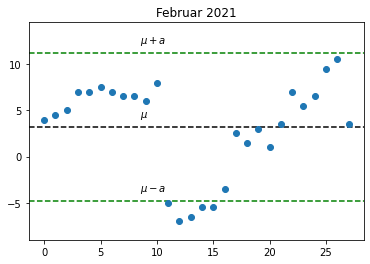

In [117]:
plt.plot(temperature,'o')
plt.title("Februar 2021")  
plt.axhline(y=mu,linestyle='--', color='black', zorder=-1)
plt.axhline(y=mu+a,linestyle='--', color='green', zorder=-1)
plt.axhline(y=mu-a,linestyle='--', color='green', zorder=-1)
plt.ylim([np.min(temperature)-2, np.max(temperature)+4])
plt.text(8.5,mu+1, r'$\mu$');
plt.text(8.5,mu+a+1, r'$\mu+a$')
plt.text(8.5,mu-a+1, r'$\mu-a$');

**Задатак 8.** Искористити код за креирање променљиве `pom`, тј. активирати кодну ћелију како би `pom` била променљива коју интерпретатор препознаје.

In [118]:
n=rndm.randint(10,100)
pom=3*rndm.normal(2,3,(n,))

а) Написати код за израчунавање распона између максималне и минималне вредности унутар низа `pom`, на следећи начин:
1. Одредити минималну вредност `minpom` низа `pom` користећи одговарајућу функцију NumPy модула.
2. Одузети `minpom` од свих елемената низа `pom` и резултат сместити у низ `c`.
3. Одредити максималну вредност `raspon` низа `c` користећи одговарајућу функцију NumPy модула.
4. Одштампати поруку о вредности траженог распона.

**Решење а):**

In [119]:
minpom=pom.min()
minpom

-13.231478240937419

In [120]:
c=pom-minpom
raspon=c.max()

print("Највећи распон у вредностима низа pom износи: ",raspon)

Највећи распон у вредностима низа pom износи:  33.97979057963897


б) Упоредити вредност `raspona` са стандардним одступањем `sigma` вектора `pom`, тј. креирати променљиву
`x`=`raspon`-`sigma`.

**Решење б):**

In [121]:
sigma=pom.std()
x=raspon-sigma
x

24.812839982879048

In [122]:
x/sigma

2.706771430801557

Закључујемо да је максималан распон вредности већи од стандардне девијације више од два пута.

в) Користећи Чебишевљеву неједнакост одредити могућ проценат компоненти вектора `pom` које имају одступање од средње вредности `mu` веће од $a=\frac{raspon-sigma}{2}.$

**Решење в):**  

Процењујемо број $k$ у Чебишевљевој неједнакости 
$$ \dfrac{k}{n}\leq\left(\dfrac{\sigma(v)}{a}\right)^2,$$
где је $k$ број компоненти вектора $v=pom$ за које важи да је $|x_i-\mu(v)|\geq a=\frac{raspon+sigma}{2}.$
$$\Longrightarrow\quad k\leq n\left(\dfrac{\sigma}{a}\right)^2$$

In [123]:
a=(raspon-sigma)/2
k_max=n*(sigma/a)**2
k_max

27.29774846862034

Проверићемо графички добијени резултат.

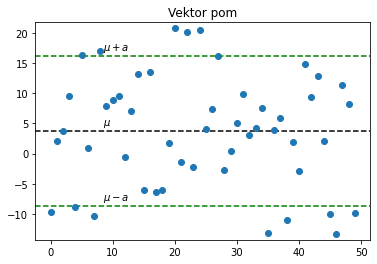

In [124]:
mu=pom.mean()
plt.plot(pom,'o')
plt.title("Vektor pom")  
plt.axhline(y=mu,linestyle='--', color='black', zorder=-1)
plt.axhline(y=mu+a,linestyle='--', color='green', zorder=-1)
plt.axhline(y=mu-a,linestyle='--', color='green', zorder=-1)
plt.ylim([mu-raspon/2-1,mu+raspon/2+1])
plt.text(8.5,mu+1, r'$\mu$');
plt.text(8.5,mu+a+1, r'$\mu+a$')
plt.text(8.5,mu-a+1, r'$\mu-a$');

## Коваријанса и корелација

За два вектора $v,u\in\mathbb{R}^n,$ и одговарајуће векторе центрираних вредности  $\dot{v}$ и $\dot{u},$ коваријанса вектора је
$$Cov(v,u)=\dfrac{\dot{v}\cdot\dot{u}}{n}\,.$$
Њом се утврђује да ли се вредности вектора $v$ и $u$ распоређују на сличан начин око своје средње вредности. Коваријанса близу вредности 0 указује да не постоји јасна повезаност смерова варијабилности два вектора. Позитивна коваријанса указује да се варијабилност мења на сличан начин: већински истовремено позитивно одступање или истовремено негативно одступање од средње вредности. Са друге стране, негативна вредност коваријансе сугерише супротне смерове одступања.

За скуп вектора $v_1,v_2,\dots,v_m\in\mathbb{R}^n,$ означимо са $A\in\mathcal{M}_{n\times m}$ матрицу чије су колоне центрирани вектори $\dot{v}_1,\dot{v}_2,\dots,\dot{v}_m.$ Матрица коваријансе скупа вектора $v_1,v_2,\dots,v_m$ је
$$Cov(v_1,v_2,\dots,v_m)=\begin{bmatrix} Cov(v_i,v_j)\end{bmatrix}_{i,j=1,\dots,n}
    =\dfrac{A^TA}{n}\,.$$

Приметимо да дијагонални елементи матрице коваријансе $Cov(v_i,v_i),\ i=1,2,\dots,n$ представљају варијансу вектора $v_i.$

**Пример 13.** Израчунаћемо коваријансе неколико случајно генерисаних вектора. Компоненте вектора смештене су дуж колона матрице $M.$ Графички приказ појасниће добијене вредности коефицијената.

In [125]:
n=50
M=np.empty((6,n))
M[0]=rndm.normal(3,1.5,n)
M[1]=(M[0])[::-1]
M[2]=2*M[0]+rndm.uniform(-1,1,n)
M[3]=-0.7*M[0]+rndm.uniform(-1,1,n)
M[4]=rndm.uniform(-3,2,n)
M[5]=rndm.normal(0,1,n)
M=M.T

In [126]:
kovarijansa=np.cov(M,rowvar=False, bias=True)
np.round(kovarijansa,3)

array([[ 2.667, -0.784,  5.318, -2.014,  0.338,  0.198],
       [-0.784,  2.667, -1.661,  0.642, -0.104, -0.187],
       [ 5.318, -1.661, 10.976, -4.02 ,  0.682,  0.414],
       [-2.014,  0.642, -4.02 ,  1.779, -0.167, -0.217],
       [ 0.338, -0.104,  0.682, -0.167,  2.435,  0.22 ],
       [ 0.198, -0.187,  0.414, -0.217,  0.22 ,  1.314]])

Матрица коваријансе бележи јаку позитивну вредност између прве и треће врсте матрице, а прва и четврта имају за коваријансу негативну вредност. Јака негативна вредност примећује се да постоји између треће и четврте врсте. Такође, трећа врста има велику варијансу.

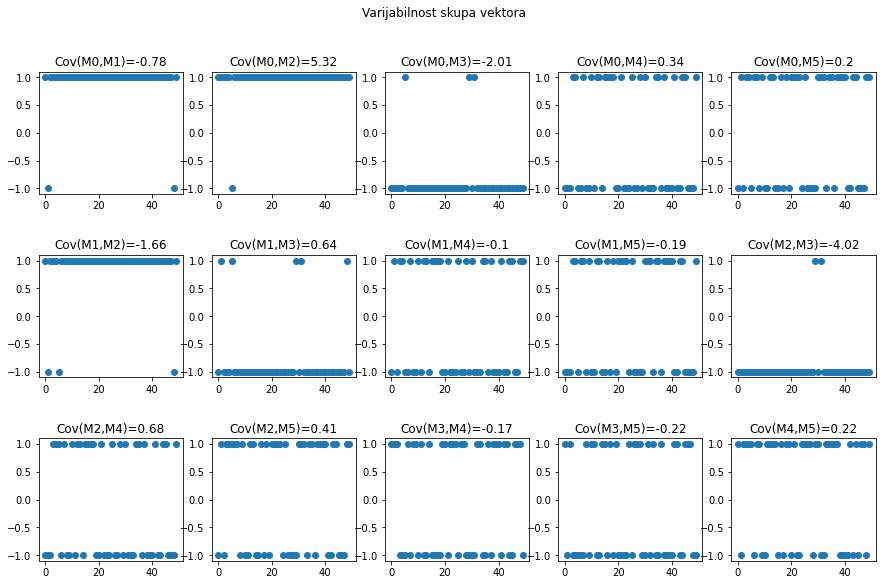

In [127]:
slika= plt.figure(figsize=(15,9)) 
slika.suptitle('Varijabilnost skupa vektora')
slika.subplots_adjust(hspace=0.5)

x=np.arange(n)
k=1
for i in range(6):
    for j in range(i+1,6):
        ax = slika.add_subplot(3,5,k)
        ime="Cov(M"+str(i)+",M"+str(j)+")="+str(np.round(kovarijansa[i,j],2))
        plt.scatter(x,np.sign(M[:,i]*M[:,j]))
        plt.title(ime)
        k=k+1;

Како бисмо визуелно разумели добијене коефицијенте, приказаћемо вредности парова вектора на графику тачкама $T\big(v(i),u(i)\big).$

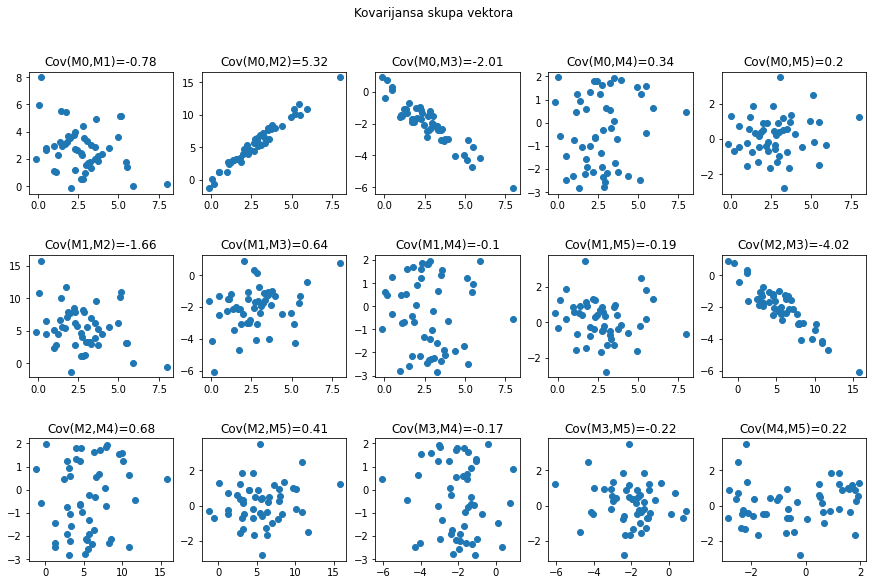

In [128]:
slika= plt.figure(figsize=(15,9)) 
slika.suptitle('Kovarijansa skupa vektora')
slika.subplots_adjust(hspace=0.5)

k=1
for i in range(6):
    for j in range(i+1,6):
        ax = slika.add_subplot(3,5,k)
        ime="Cov(M"+str(i)+",M"+str(j)+")="+str(np.round(kovarijansa[i,j],2))
        plt.scatter(M[:,i],M[:,j])
        plt.title(ime)
        k=k+1;

Проблем са коваријансом као оценом повезаности смера промена компоненти јесте што њена вредност може да буде диктирана и малим бројем доминантних сабирака, тј. зависи од малог броја довољно великих екстрема међу компонентама вектора. Скалирањем, тј. нормализацијом вектора се тај утицај донекле ублажава.

За два вектора $v,u\in\mathbb{R}^n$ и одговарајуће векторе центрираних вредности  $\dot{v}$ и $\dot{u},$ коефицијент корелације је
$$\rho(v,u)=\dfrac{\dot{v}\cdot\dot{u}}{\|\dot{v}\|\,\|\dot{u}\|}
	=\cos\angle(\dot{v},\dot{u})=\dfrac{Cov(v,u)}{\sigma(v)\,\sigma(u)}.$$
Коваријансом се утврђује смер повезаности два вектора. Коефицијент корелације мери јачину повезаности између вредности вектора $v$ и $u.$

За скуп вектора $v_1,v_2,\dots,v_m\in\mathbb{R}^n,$ означимо са $A_*\in\mathcal{M}_{n\times m}$ матрицу чије су колоне   $\dot{v}_1^*,\dot{v}_2^*,\dots,\dot{v}_m^*$ нормирани вектори центрираних вектора $v_1,v_2,\dots,v_m.$ Матрица корелације скупа вектора $v_1,v_2,\dots,v_m$ је
$$Corr(v_1,v_2,\dots,v_m)=\begin{bmatrix} \rho(v_i,v_j)\end{bmatrix}_{i,j=1,\dots,n}
    =A_*^TA_*.$$
Зове се још и нормализована матрица коваријансе.    

Вредност коефицијента корелације креће се у опсегу $[-1,1].$ Означимо координате вектора $v$ и $u,$  
$$v=\begin{bmatrix}x_1&x_2&\dots&x_n\end{bmatrix},\qquad
u=\begin{bmatrix}y_1&y_2&\dots&y_n\end{bmatrix}.$$
Биће $\rho(v,u)=1$ када тачке $(x_i,y_i),\ i=1,2,\dots,n,$ леже све на једној истој правој позитивног коефицијента правца, тј. растућој правој. Овакву ситуацију називамо комплетна позитивна корелација. 

Слично, $\rho(v,u)=-1$ означава да су тачке са координатама $(x_i,y_i),\ i=1,2,\dots,n,$ на опадајућој правој. Та ситуација се назива комплетна негативна корелација. Вредност $\rho(v,u)\approx0$ индицира да су вектори вредности некорелисани.

**Пример 14.** Одредићемо коефицијенте корелације вектора колона матрице $M$ из претходног примера.

In [129]:
korel=np.corrcoef(M,rowvar=False)
np.round(korel,2)

array([[ 1.  , -0.29,  0.98, -0.92,  0.13,  0.11],
       [-0.29,  1.  , -0.31,  0.29, -0.04, -0.1 ],
       [ 0.98, -0.31,  1.  , -0.91,  0.13,  0.11],
       [-0.92,  0.29, -0.91,  1.  , -0.08, -0.14],
       [ 0.13, -0.04,  0.13, -0.08,  1.  ,  0.12],
       [ 0.11, -0.1 ,  0.11, -0.14,  0.12,  1.  ]])

In [130]:
np.round(kovarijansa,3)

array([[ 2.667, -0.784,  5.318, -2.014,  0.338,  0.198],
       [-0.784,  2.667, -1.661,  0.642, -0.104, -0.187],
       [ 5.318, -1.661, 10.976, -4.02 ,  0.682,  0.414],
       [-2.014,  0.642, -4.02 ,  1.779, -0.167, -0.217],
       [ 0.338, -0.104,  0.682, -0.167,  2.435,  0.22 ],
       [ 0.198, -0.187,  0.414, -0.217,  0.22 ,  1.314]])

**Задатак 9.** Показати особине коваријансе вектора $v,u,w\in\mathbb{R}^n,$
$Cov(v,u)=\dfrac{\dot{v}\cdot\dot{u}}{n}.$

а) $Cov(e,v)=0,\hspace{7cm}$  б) $Cov(\alpha v,u)=\alpha Cov(v,u),$

в) $Cov(v,u)=\dfrac{v\cdot u}{n}-\mu(v)\mu(u),\hspace{4.2cm}$ г) $Cov(v,v)=\|\dot{v}\|_{sr}^2,$

д) $Cov(v+u,w)=Cov(v,w)+Cov(u,w)n,\hspace{2cm}$   ђ)  $Cov(u+e,v)=Cov(u,v).$

**Решење :**

a) $Cov(e,v)=\dfrac{\dot{e}\cdot\dot{v}}{n}=\dfrac{\theta\cdot\dot{v}}{n}=0.$
     
б) $Cov(\alpha v,u)=\dfrac{\dot{(\alpha v)}\cdot\dot{u}}{n}=\dfrac{\alpha\dot{v}\cdot\dot{u}}n=\alpha Cov(v,u).$  

в) $Cov(v,u)=\dfrac{\dot{v}\cdot\dot{u}}{n}=\dfrac{(v-\mu(v)e)\cdot(u-\mu(u)e)}{n}$
\begin{align}
    &=\dfrac{v\cdot u-\mu(u)(v\cdot e)-\mu(v)(e\cdot u)+\mu(v)\mu(u)(e\cdot e)}{n}\\
    &=\dfrac{v\cdot u-\mu(u)n\mu(v)-\mu(v)n\mu(u)+\mu(v)\mu(u)n}{n}
    =\dfrac{v\cdot u-n\mu(v)\mu(u)+\mu(v)\mu(u)n}{n}\\
    &=\dfrac{v\cdot u}{n}-\mu(v)\mu(u).
\end{align}

г) $Cov(v,v)=\dfrac{\dot{v}\cdot\dot{v}}{n}=\|\dot{v}\|_{sr}^2.$

д) $Cov(v+u,w)=\dfrac{\dot{(v+u)}\cdot\dot{w}}{n}
=\dfrac{(\dot{v}+\dot{u})\cdot\dot{w}}{n}=Cov(v,w)+Cov(u,w).$

ђ) $Cov(u+e,v)=Cov(u,v)+Cov(e,v)=Cov(u,v)+0=Cov(u,v).$

**Задатак 10.** Нека су дати вектори $v,u\in\mathbb{R}^n$ и њихови центрирани вектори  $\dot{v}$ i $\dot{u}.$ Показати да коефицијент корелације  $$\rho(v,u)=\dfrac{\dot{v}^T\dot{u}}{\|\dot{v}\|\,\|\dot{u}\|}=\cos\angle(\dot{v},\dot{u})$$ има следеће особине 

a) $\rho(v,u)=\dfrac{\widetilde{v}^T\widetilde{u}}{n},$ где су $\widetilde{v}$ и $\widetilde{u}$ стандардизовани вектори $v$ и $u,$ редом.

б) $\sigma(v+u)=\sqrt{\sigma(v)^2+2\rho(v,u)\sigma(v)\sigma(u)+\sigma(u)^2}\,.$

**Решење :**

$\widetilde{v}=\dfrac{\dot{v}}{\sigma(v)}\ \Longrightarrow\ 
\dot{v}=\sigma(v)\cdot\widetilde{v}\ \Longrightarrow\ \|\dot{v}\|=\sigma(v)\|\widetilde{v}\|$

a) $\rho(v,u)=\dfrac{\dot{v}^T\dot{u}}{\|\dot{v}\|\,\|\dot{u}\|}
=\dfrac{\sigma(v)\sigma(u)\left(\widetilde{v}^T\widetilde{u}\right)}{\sigma(v)\sigma(u)\|\widetilde{v}\|\|\widetilde{u}\|}
=\dfrac{\widetilde{v}^T\widetilde{u}}{\|\widetilde{v}\|\|\widetilde{u}\|}
=\dfrac{\widetilde{v}^T\widetilde{u}}{\sqrt{n}\sqrt{n}}
=\dfrac{\widetilde{v}^T\widetilde{u}}{n}\,.$

б) $\dot{v+u}=v+u-\mu(v+u)=v+u-\mu(v)-\mu(u)=\dot{v}+\dot{u}.$
\begin{align}
    \sigma(v+u)^2&=\dfrac{\|\dot{v+u}\|^2}{n}
=\dfrac{\|\dot{v}+\dot{u}\|^2}{n}
=\dfrac{\|\dot{v}\|^2+\|\dot{u}\|^2+2\dot{v}^T\dot{u}}{n}
=\dfrac{\|\dot{v}\|^2}{n}+\dfrac{\|\dot{u}\|^2}{n}+2\dfrac{\dot{v}^T\dot{u}}{n}\\
&=\sigma(v)^2+\sigma(u)^2+2\dfrac{\dot{v}^T\dot{u}}{\|\dot{v}\|\,\|\dot{u}\|}\dfrac{\|\dot{v}\|\,\|\dot{u}\|}{n}
=\sigma(v)^2+\sigma(u)^2+2\rho(v,u)\sigma(v)\sigma(u).
\end{align}

**Задатак 11.** Нека је дат низ реалних бројева $x_0,x_1,\dots,x_{n-1}.$ Након израчунавања средње вредности и варијансе овог скупа података придружена је нова вредност скупу $x_n.$ Ажурирати средњу вредност и варијансу тако да одговара новом скупу података, без коришћења свих претходних вредности $x_0,x_1,\dots,x_{n-1}.$

**Решење :**

Означимо векторе
$$v_n=\begin{bmatrix}x_0&x_1&\dots&x_{n-1}\end{bmatrix},\qquad
v_{n+1}=\begin{bmatrix}x_0&x_1&\dots&x_{n-1}&x_n\end{bmatrix}.$$
Нека су познате вредности 
$$\mu_n=\dfrac{x_0+x_1+\dots+x_{n-1}}{n},\qquad Var_n=\dfrac{(x_0-\mu_n)^2+(x_1-\mu_n)^2+\dots+(x_{n-1}-\mu_n)^2}{n}\,.$$
Тада је
\begin{align}
\mu_{n+1}&=\dfrac{x_0+x_1+\dots+x_{n-1}+x_n}{n+1}=\dfrac{n\mu_n+x_n}{n+1}.
\end{align}

На основу једнакости $Var(v)=\dfrac{\|v\|^2}{n}-\mu(v)^2$ имамо да је $n\,Var(v)=\|v\|^2-n\,\mu(v)^2.$ Због тога за $Var_{n+1}$ и $Var_{n}$ важи:

\begin{align}
(n+1)Var_{n+1}&=\|v_{n+1}\|^2-(n+1)\mu_{n+1}^2=x_0^2+x_1^2+\dots+x_{n-1}^2+x_n^2-(n+1)\mu_{n+1}^2\\
&=\|v_n\|^2+x_n^2-(n+1)\left(\dfrac{n\mu_n+x_n}{n+1}\right)^2\\
n\,Var_n&=\|v_n\|^2-n\,\mu_n^2,\\
(n+1)Var_{n+1}-n\,Var_n&=x_n^2+n\,\mu_n^2-(n+1)\left(\dfrac{n\mu_n+x_n}{n+1}\right)^2\\
&=\dfrac{n}{n+1}(x_n-\mu_n)^2,\\
Var_{n+1}&=\dfrac{n}{n+1}\left(Var_n+\dfrac{(x_n-\mu_n)^2}{n+1}\right).
\end{align}